<a href="https://colab.research.google.com/github/NhungNgo58/Casestudy/blob/main/BellaBeat_Google_Data_Analytics_Capstone_Projects_BigQuery%2BPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the company

Bellabeat, a high-tech manufacturer of health-focused products for women. They offer different smart devices that collect data on activity, sleep, stress, and reproductive health to empower women with knowledge about their own health and habits. 

# Business Task

The main focus of this case is to analyze smart device data to gain insight into how consumers are using their smart devices. Then using this information in order to indentify potential opportunities for growth and recommendations for the Bellabeat marketing strategy improvement based on trends in smart device usage.

# Questions for the analysis
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customer?
3. How couls these trends help influence Bellabeast marketing strategy?

I will use BigQuerry to extract the data

1. How active user are?
* Do customers spend a considerable amount of time being active?
* Do customers spend a considerable amount of time being sedentary?
* How does this active data vary on days of the week?

2. How does this data vary on weekdays vs weekends?
3. What factors contribute to highest calories burn?
4. Have customer been following a steady sleep schedule? What factors influence it?
5. Understand the sleep stages and find out find out what it takes to get a better deep sleep.

# Data Information
## Daily Activity -  Contains daily totals for steps, intensity, distance, and calories

* ActivityDate
* TotalSteps
* TotalDistance: Total kilometers tracked
* TrackerDistance: Total kilometers tracked by Fitbit device
* LoggedActivitiesDistance: Total kilometers from logged activitie
* VeryActiveDistance: Kilometers travelled during very active activity
* ModeratelyActiveDistance: Kilometers travelled during moderate activity.
* LightActiveDistance: Kilometers travelled during light activity (hoạt động nhẹ)
* SedentaryActiveDistance: Kilometers travelled during sedentary activity.(ít vận động)
* VeryActiveMinutes: Total minutes spent in very active activity.
* FairlyActiveMinutes: Total minutes spent in moderate activity.
* LightlyActiveMinutes: Total minutes spent in light activity. (tổng số phút dành cho hoạt động nhẹ)
* SedentaryMinutes: Total minutes spent in sedentary activity.
* Calories: Total estimated energy expenditure (in
kilocalories).

## Intensity - Time spent in one of four intensity categories.Hour totals
* ActivityHour: Date and hour value in mm/dd/yyyy hh:mm:ss format.
* TotalIntensity: Value calculated by adding all the minute-level intensity:  that occurred within the hour.
* AverageIntensity: Average intensity state exhibited during that hour (TotalIntensity for that ActivityHour divided
by 60).

## Sleep

* SleepDay: Date on which the sleep event started. (in
mm/dd/yyyy hh:mm:ss format)
* TotalSleepRecords: Number of recorded sleep periods for that day. Includes naps > 60min
* TotalMinutesAsleep: Total number of minutes classified as being “asleep”.
* TotalTimeInBed: Total minutes spent in bed, including asleep, restless, and awake, that occurred during a defined sleep record.
* TotalMinutesLight: Total number of minutes classified as being in Light sleep stage
* TotalMinutesDeep: Total number of minutes classified as being in deep sleep.
* TotalMinutesREM:  Total number of minutes classified as being in
REM sleep

# DataSet Exploration by using BigQuery

## import the required libraries

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

from datetime import datetime



## Check to see which column name is Primary key

We could see that ID column is shared across 

In [ ]:
%%bigquery --project directed-strata-352504
SELECT 
  column_name,
  COUNT(table_name)
FROM `directed-strata-352504.FitBit.INFORMATION_SCHEMA.COLUMNS`
GROUP BY 1 #group the first column in SELECT statement which is column_name

Query is running:   0%|          |

Downloading:   0%|          |

,column_name,f0_
0,Id,8
1,ActivityDay,3
2,Calories,3
3,ActivityDate,1
4,TotalSteps,1
5,TotalDistance,1
6,TrackerDistance,1
7,LoggedActivitiesDistance,1
8,VeryActiveDistance,2
9,ModeratelyActiveDistance,2


### Let's make sure ID column is in every table we have

In [ ]:
%%bigquery --project directed-strata-352504
SELECT
  table_name,
  SUM(CASE
          WHEN column_name = 'Id' THEN 1  # WHEN condition1 THEN resultl #Check the column_name
          ELSE 0
          END) AS has_id_column
FROM `directed-strata-352504.FitBit.INFORMATION_SCHEMA.COLUMNS`
GROUP BY 1
ORDER BY 1 ASC

Query is running:   0%|          |

Downloading:   0%|          |

,table_name,has_id_column
0,daily_activity,1
1,daily_calories,1
2,daily_intensities,1
3,daily_steps,1
4,hourly_calories,1
5,hourly_intensity,1
6,hourly_step,1
7,sleep_day,1


## Check DataType Date or Time in tables

### Check if each table has a column of a DATE or TIME related type

NOTE: if we had columns of the type DATETIME, TIMESTAMP, or DATE, this table will be empty

In [ ]:
%%bigquery --project directed-strata-352504 
SELECT 
        table_name, #Check data_type
        SUM(CASE 
                WHEN data_type IN ('TIMESTAMP','DATETIME','TIME','DATE') THEN 1
            ELSE 0
            END) AS has_time_type
FROM `directed-strata-352504.FitBit.INFORMATION_SCHEMA.COLUMNS`
WHERE
  data_type IN ('TIMESTAMP','DATETIME','TIME','DATE')
GROUP BY 1 
HAVING 
  has_time_type = 0;       

# Because we found that each table has a column of date or time related type, we can check for their names

SELECT 
      table_name,
      column_name,
      CONCAT(table_catalog, '.',table_schema,'.',table_name) AS table_path
FROM 
`directed-strata-352504.FitBit.INFORMATION_SCHEMA.COLUMNS`
WHERE 
data_type IN ('TIMESTAMP','DATETIME','TIME','DATE')


Query is running:   0%|          |

Downloading:   0%|          |

,table_name,column_name,table_path
0,daily_calories,ActivityDay,directed-strata-352504.FitBit.daily_calories
1,daily_activity,ActivityDate,directed-strata-352504.FitBit.daily_activity
2,daily_intensities,ActivityDay,directed-strata-352504.FitBit.daily_intensities
3,hourly_calories,ActivityHour,directed-strata-352504.FitBit.hourly_calories
4,hourly_intensity,ActivityHour,directed-strata-352504.FitBit.hourly_intensity
5,daily_steps,ActivityDay,directed-strata-352504.FitBit.daily_steps
6,hourly_step,ActivityHour,directed-strata-352504.FitBit.hourly_step
7,sleep_day,SleepDay,directed-strata-352504.FitBit.sleep_day


Check if  the column name has any of the keywords below:
- date, minute, daily, hourly, day, seconds

In [ ]:
%%bigquery --project directed-strata-352504 
SELECT
  table_name,
  column_name
FROM 
`directed-strata-352504.FitBit.INFORMATION_SCHEMA.COLUMNS`
WHERE 
   REGEXP_CONTAINS(LOWER(column_name),'date|minute|daily|hourly|day|seconds')

Query is running:   0%|          |

Downloading:   0%|          |

,table_name,column_name
0,daily_calories,ActivityDay
1,daily_activity,ActivityDate
2,daily_activity,VeryActiveMinutes
3,daily_activity,FairlyActiveMinutes
4,daily_activity,LightlyActiveMinutes
5,daily_activity,SedentaryMinutes
6,daily_intensities,ActivityDay
7,daily_intensities,SedentaryMinutes
8,daily_intensities,LightlyActiveMinutes
9,daily_intensities,FairlyActiveMinutes


## Daily_df - Merge all daily tables data and the sleep data

For this analysis I'm going to focus on the daily timeframe as my analysis is focused on detecting high-level trends in usage, not in the detailed performance of the users


### Find tables that might be at the day level

In [ ]:
%%bigquery --project directed-strata-352504
SELECT 
    DISTINCT table_name
FROM 
`directed-strata-352504.FitBit.INFORMATION_SCHEMA.COLUMNS`
WHERE
REGEXP_CONTAINS(LOWER(table_name),'day|daily')

Query is running:   0%|          |

Downloading:   0%|          |

,table_name
0,daily_calories
1,daily_activity
2,daily_intensities
3,daily_steps
4,sleep_day


### After having a list of tables, we should look at the columns in those tables

In [ ]:
%%bigquery --project directed-strata-352504
SELECT 
        column_name,
        table_name
FROM 
`directed-strata-352504.FitBit.INFORMATION_SCHEMA.COLUMNS`
WHERE 
REGEXP_CONTAINS(LOWER(table_name),'day|daily')
GROUP BY 1,2;

Query is running:   0%|          |

Downloading:   0%|          |

,column_name,table_name
0,Id,daily_calories
1,ActivityDay,daily_calories
2,Calories,daily_calories
3,Id,daily_activity
4,ActivityDate,daily_activity
5,TotalSteps,daily_activity
6,TotalDistance,daily_activity
7,TrackerDistance,daily_activity
8,LoggedActivitiesDistance,daily_activity
9,VeryActiveDistance,daily_activity


### Make certain that the data types align bertween tables

In [ ]:
%%bigquery --project directed-strata-352504

SELECT 
      column_name,
      table_name,
      data_type

FROM 
`directed-strata-352504.FitBit.INFORMATION_SCHEMA.COLUMNS`

WHERE 
    REGEXP_CONTAINS(LOWER(table_name),'day|daily') # table name must be day|daily
    AND column_name IN (                           # AND column name must be in those table have name "day|daily"
      SELECT column_name
      FROM `directed-strata-352504.FitBit.INFORMATION_SCHEMA.COLUMNS`
      WHERE 
        REGEXP_CONTAINS(LOWER(table_name),'day|daily')
      GROUP BY 1 # group by column_name
      HAVING
        COUNT(table_name) >=2 ) 
ORDER BY 1

Query is running:   0%|          |

Downloading:   0%|          |

,column_name,table_name,data_type
0,ActivityDay,daily_calories,DATE
1,ActivityDay,daily_intensities,DATE
2,ActivityDay,daily_steps,DATE
3,Calories,daily_calories,INT64
4,Calories,daily_activity,INT64
5,FairlyActiveMinutes,daily_activity,INT64
6,FairlyActiveMinutes,daily_intensities,INT64
7,Id,daily_calories,INT64
8,Id,daily_activity,INT64
9,Id,daily_intensities,INT64


### Check number of particpants in each tables

In [ ]:
%%bigquery --project directed-strata-352504 
SELECT  
*
FROM `directed-strata-352504.FitBit.daily_activity`;

Query is running:   0%|          |

Downloading:   0%|          |

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [ ]:
%%bigquery --project directed-strata-352504 
SELECT 
COUNT(DISTINCT Id)
FROM `directed-strata-352504.FitBit.daily_activity`;

Query is running:   0%|          |

Downloading:   0%|          |

,f0_
0,33


In [ ]:
%%bigquery --project directed-strata-352504 
SELECT
COUNT(DISTINCT Id)
FROM `directed-strata-352504.FitBit.daily_calories`;

Query is running:   0%|          |

Downloading:   0%|          |

,f0_
0,33


In [ ]:
%%bigquery --project directed-strata-352504 
SELECT
COUNT(DISTINCT Id)
FROM `directed-strata-352504.FitBit.daily_intensities`;

Query is running:   0%|          |

Downloading:   0%|          |

,f0_
0,33


In [ ]:
%%bigquery --project directed-strata-352504 
SELECT
COUNT(DISTINCT Id)
FROM `directed-strata-352504.FitBit.daily_steps`;

Query is running:   0%|          |

Downloading:   0%|          |

,f0_
0,33


In [ ]:
%%bigquery --project directed-strata-352504 
SELECT
*
FROM `directed-strata-352504.FitBit.daily_steps`;

Query is running:   0%|          |

Downloading:   0%|          |

,Id,ActivityDay,StepTotal
0,1503960366,2016-04-12,13162
1,1503960366,2016-04-13,10735
2,1503960366,2016-04-14,10460
3,1503960366,2016-04-15,9762
4,1503960366,2016-04-16,12669
...,...,...,...
935,8877689391,2016-05-08,10686
936,8877689391,2016-05-09,20226
937,8877689391,2016-05-10,10733
938,8877689391,2016-05-11,21420


In [ ]:
%%bigquery --project directed-strata-352504 
SELECT 
COUNT(DISTINCT Id)
FROM `directed-strata-352504.FitBit.sleep_day`;

Query is running:   0%|          |

Downloading:   0%|          |

,f0_
0,24


Onservation: 
* There is 33 participants in the activity, calories and intensities, steps data sets
* There is 24 participants in the sleep dataset.


### Combine Data 

In [ ]:
%%bigquery daily_df --project directed-strata-352504

SELECT            # A SELECT * EXCEPT statement specifies the names of one or more columns to exclude from the result. All matching column names are omitted from the output.
A.Id,
A.Calories, # Choose Calories in Activity table because the Intensities didn't have that columns
* EXCEPT(
  Id,
  Calories,
  ActivityDay, # Choose ActivityDate in Activity Tables as unique date column, Exclude 'ActivityDay' columns from Itensity, Steps, Calories, Sleeps. 
  SleepDay,
  FairlyActiveMinutes,
  LightActiveDistance,
  LightlyActiveMinutes,
  ModeratelyActiveDistance,
  SedentaryActiveDistance,
  SedentaryMinutes,
  VeryActiveDistance,
  VeryActiveMinutes,
  TotalSteps
  ),
I.SedentaryMinutes,
I.LightlyActiveMinutes,
I.FairlyActiveMinutes,
I.VeryActiveMinutes,
I.SedentaryActiveDistance,
I.LightActiveDistance,
I.ModeratelyActiveDistance,
I.VeryActiveDistance,
FROM 
`directed-strata-352504.FitBit.daily_activity` A

 # merge Activity with Calories table
LEFT JOIN 
`directed-strata-352504.FitBit.daily_calories` C # merge Activity with Calories table
ON 
A.Id = C.Id
AND A.ActivityDate = C.ActivityDay
AND A.Calories = C.Calories

# Then merge Activity with Intensity table
LEFT JOIN 
`directed-strata-352504.FitBit.daily_intensities` I
ON
  A.Id = I.Id
  AND A.ActivityDate = I.ActivityDay
  AND A.SedentaryMinutes = I.SedentaryMinutes
  AND A.LightlyActiveMinutes = I.LightlyActiveMinutes
  AND A.FairlyActiveMinutes = I.FairlyActiveMinutes
  AND A.SedentaryActiveDistance = I.SedentaryActiveDistance
  AND A.LightActiveDistance = I.LightActiveDistance
  AND A.ModeratelyActiveDistance = I.ModeratelyActiveDistance
  AND A.VeryActiveDistance = I.VeryActiveDistance
  AND A.VeryActiveMinutes = I.VeryActiveMinutes

# merge Activity with Daily Steps table
LEFT JOIN 
`directed-strata-352504.FitBit.daily_steps` S
ON 
  A.Id = S.Id
  AND A.ActivityDate = S.ActivityDay
  

#merge Activity with Sleep table
LEFT JOIN
`directed-strata-352504.FitBit.sleep_day` Sl

ON 
A.Id = Sl.Id
AND A.ActivityDate = Sl.SleepDay 


Query is running:   0%|          |

Downloading:   0%|          |

## Hourly dataframe

### Find table that might be at hourly level

In [ ]:
%%bigquery --project directed-strata-352504
SELECT
  DISTINCT table_name
FROM 
`directed-strata-352504.FitBit.INFORMATION_SCHEMA.COLUMNS`
WHERE
REGEXP_CONTAINS(LOWER(table_name),'hour|hourly')

Query is running:   0%|          |

Downloading:   0%|          |

,table_name
0,hourly_calories
1,hourly_intensity
2,hourly_step


In [ ]:
# look at the columns in those table
%%bigquery --project directed-strata-352504
SELECT
table_name,
column_name
FROM
`directed-strata-352504.FitBit.INFORMATION_SCHEMA.COLUMNS`
WHERE
REGEXP_CONTAINS(LOWER(table_name),'hour|hourly')

Query is running:   0%|          |

Downloading:   0%|          |

,table_name,column_name
0,hourly_calories,Id
1,hourly_calories,ActivityHour
2,hourly_calories,Calories
3,hourly_intensity,Id
4,hourly_intensity,ActivityHour
5,hourly_intensity,TotalIntensity
6,hourly_intensity,AverageIntensity
7,hourly_step,Id
8,hourly_step,ActivityHour
9,hourly_step,StepTotal


### Check number of participants in each tables

In [ ]:
%%bigquery --project directed-strata-352504
SELECT 
COUNT(DISTINCT Id)
FROM
`directed-strata-352504.FitBit.hourly_step` AS users_step;

Query is running:   0%|          |

Downloading:   0%|          |

,f0_
0,33


In [ ]:
%%bigquery --project directed-strata-352504
SELECT 
COUNT(DISTINCT Id)
FROM
`directed-strata-352504.FitBit.hourly_intensity` AS users_intensity;

Query is running:   0%|          |

Downloading:   0%|          |

,f0_
0,33


In [ ]:
%%bigquery --project directed-strata-352504
SELECT
COUNT(DISTINCT Id)
FROM
`directed-strata-352504.FitBit.hourly_calories` AS users_calories;

Query is running:   0%|          |

Downloading:   0%|          |

,f0_
0,33


### Combine Data

In [ ]:
%%bigquery hourly_df --project directed-strata-352504
SELECT
A.Id,
A.ActivityHour,
A.StepTotal,
B.TotalIntensity,
B.AverageIntensity,
C.Calories

FROM
`directed-strata-352504.FitBit.hourly_step` AS A

# merge hourly_step with hourly_intensity
LEFT JOIN
`directed-strata-352504.FitBit.hourly_intensity` AS B
ON 
A.Id = B.Id
AND A.ActivityHour = B.ActivityHour

# merge hourly_step with hourly_calories
LEFT JOIN
`directed-strata-352504.FitBit.hourly_calories` AS C
ON A.Id = C.Id
AND A.ActivityHour = C.ActivityHour


Query is running:   0%|          |

Downloading:   0%|          |

# Data Cleaning


In [ ]:
daily_df.head(5)

,Id,Calories,ActivityDate,TotalDistance,TrackerDistance,LoggedActivitiesDistance,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,1985,2016-04-12,8.50,8.50,0,13162,1,327,346,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,1797,2016-04-13,6.97,6.97,0,10735,2,384,407,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,1776,2016-04-14,6.74,6.74,0,10460,<NA>,<NA>,<NA>,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,1745,2016-04-15,6.28,6.28,0,9762,1,412,442,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,1863,2016-04-16,8.16,8.16,0,12669,2,340,367,773,221,10,36,0.0,5.04,0.41,2.71


In [ ]:
hourly_df.head(5)

,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories
0,1503960366,2016-04-12 14:00:00+00:00,1166,36,0.600000,110
1,1503960366,2016-04-12 15:00:00+00:00,2063,58,0.966667,151
2,1503960366,2016-04-12 19:00:00+00:00,558,39,0.650000,104
3,1503960366,2016-04-12 20:00:00+00:00,1733,41,0.683333,132
4,1503960366,2016-04-13 14:00:00+00:00,1577,46,0.766667,128


## Handling the Duplicates

In [ ]:
duplicate = daily_df[daily_df.duplicated()]
duplicate

,Id,Calories,ActivityDate,TotalDistance,TrackerDistance,LoggedActivitiesDistance,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
436,4388161847,2899,2016-05-05,7.38,7.38,0,9603,1,471,495,896,199,39,12,0.0,5.09,1.67,0.63
532,4702921684,3683,2016-05-07,11.65,11.65,0,14370,1,520,543,577,439,46,5,0.0,8.97,2.31,0.37
834,8378563200,4005,2016-04-25,9.84,9.84,2,12405,1,388,402,692,141,16,117,0.0,3.92,0.87,5.05


As we can see, there are three duplicate rows in this dataset.

In [ ]:
daily_df = daily_df.drop_duplicates()
daily_df 

,Id,Calories,ActivityDate,TotalDistance,TrackerDistance,LoggedActivitiesDistance,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,1985,2016-04-12,8.500000,8.500000,0,13162,1,327,346,728,328,13,25,0.00,6.06,0.55,1.88
1,1503960366,1797,2016-04-13,6.970000,6.970000,0,10735,2,384,407,776,217,19,21,0.00,4.71,0.69,1.57
2,1503960366,1776,2016-04-14,6.740000,6.740000,0,10460,<NA>,<NA>,<NA>,1218,181,11,30,0.00,3.91,0.40,2.44
3,1503960366,1745,2016-04-15,6.280000,6.280000,0,9762,1,412,442,726,209,34,29,0.00,2.83,1.26,2.14
4,1503960366,1863,2016-04-16,8.160000,8.160000,0,12669,2,340,367,773,221,10,36,0.00,5.04,0.41,2.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,2847,2016-05-08,8.110000,8.110000,0,10686,<NA>,<NA>,<NA>,1174,245,4,17,0.00,6.80,0.20,1.08
939,8877689391,3710,2016-05-09,18.250000,18.250000,0,20226,<NA>,<NA>,<NA>,1131,217,19,73,0.05,6.24,0.80,11.10
940,8877689391,2832,2016-05-10,8.150000,8.150000,0,10733,<NA>,<NA>,<NA>,1187,224,11,18,0.00,6.28,0.46,1.35
941,8877689391,3832,2016-05-11,19.559999,19.559999,0,21420,<NA>,<NA>,<NA>,1127,213,12,88,0.00,5.89,0.41,13.22


In [ ]:
# check if there are any duplicated indexes in our data 
daily_df.index.is_unique

True

In [ ]:
hourly_duplicate = hourly_df[hourly_df.duplicated()]
hourly_duplicate

,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories


As we can see, we dont have duplicate rows in hourly_df

## Handing the Missing Values

### daily_df

In [ ]:
df_na = daily_df.isnull().sum()/len(daily_df) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'missing rate':df_na})
missing_data

,missing rate
TotalSleepRecords,56.382979
TotalMinutesAsleep,56.382979
TotalTimeInBed,56.382979


In [ ]:
df_na_1 = daily_df.isnull().sum().sort_values(ascending=False)
na_plot = pd.DataFrame({'total_missing_value':df_na_1})
na_plot

,total_missing_value
TotalTimeInBed,530
TotalSleepRecords,530
TotalMinutesAsleep,530
SedentaryMinutes,0
ModeratelyActiveDistance,0
LightActiveDistance,0
SedentaryActiveDistance,0
VeryActiveMinutes,0
FairlyActiveMinutes,0
LightlyActiveMinutes,0


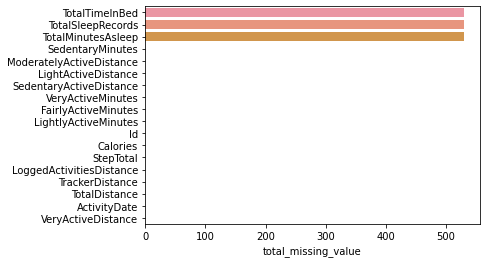

In [ ]:
sns.barplot(x='total_missing_value',y=na_plot.index, data=na_plot)

Replace the missing values in `TotalTimeInBed` `TotalSleepRecord` `TotalMinutesAsleep` = 0

In [ ]:
daily_df = daily_df.replace(np.nan,0)

In [ ]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 942
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    Int64  
 1   Calories                  940 non-null    Int64  
 2   ActivityDate              940 non-null    dbdate 
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    Int64  
 6   StepTotal                 940 non-null    Int64  
 7   TotalSleepRecords         940 non-null    Int64  
 8   TotalMinutesAsleep        940 non-null    Int64  
 9   TotalTimeInBed            940 non-null    Int64  
 10  SedentaryMinutes          940 non-null    Int64  
 11  LightlyActiveMinutes      940 non-null    Int64  
 12  FairlyActiveMinutes       940 non-null    Int64  
 13  VeryActiveMinutes         940 non-null    Int64  
 14  SedentaryA

### hourly_df

In [ ]:
df_na = hourly_df.isnull().sum()/len(daily_df) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'missing rate':df_na})
missing_data

,missing rate


In [ ]:
hourly_df.isnull().sum()/len(hourly_df) * 100

Id                  0.0
ActivityHour        0.0
StepTotal           0.0
TotalIntensity      0.0
AverageIntensity    0.0
Calories            0.0
dtype: float64

In [ ]:
df_na_1 = hourly_df.isnull().sum()/len(hourly_df) * 100
df_na_1 = df_na_1.drop(df_na_1[df_na_1 == 0].index).sort_values(ascending=False)
missing_data_1 = pd.DataFrame({'missing rate':df_na_1})
missing_data_1

,missing rate


## Adding new columns

### hourly_df

In [ ]:
hourly_df.head(5)

,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories
0,1503960366,2016-04-12 14:00:00+00:00,1166,36,0.600000,110
1,1503960366,2016-04-12 15:00:00+00:00,2063,58,0.966667,151
2,1503960366,2016-04-12 19:00:00+00:00,558,39,0.650000,104
3,1503960366,2016-04-12 20:00:00+00:00,1733,41,0.683333,132
4,1503960366,2016-04-13 14:00:00+00:00,1577,46,0.766667,128


In [ ]:
hourly_df['Time'] = pd.to_datetime(hourly_df['ActivityHour']).dt.time
hourly_df['Date'] = pd.to_datetime(hourly_df['ActivityHour']).dt.date

In [ ]:
hourly_df.head()

,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories,Time,Date
0,1503960366,2016-04-12 14:00:00+00:00,1166,36,0.600000,110,14:00:00,2016-04-12
1,1503960366,2016-04-12 15:00:00+00:00,2063,58,0.966667,151,15:00:00,2016-04-12
2,1503960366,2016-04-12 19:00:00+00:00,558,39,0.650000,104,19:00:00,2016-04-12
3,1503960366,2016-04-12 20:00:00+00:00,1733,41,0.683333,132,20:00:00,2016-04-12
4,1503960366,2016-04-13 14:00:00+00:00,1577,46,0.766667,128,14:00:00,2016-04-13


In [ ]:
hourly_df['Date'] = pd.to_datetime(hourly_df['Date'])
hourly_df['day_of_week'] = hourly_df['Date'].dt.dayofweek
hourly_df['DayOfTheWeek'] = hourly_df['Date'].dt.day_name()

In [ ]:
hourly_df.head(5)

,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories,Time,Date,day_of_week,DayOfTheWeek
0,1503960366,2016-04-12 14:00:00+00:00,1166,36,0.600000,110,14:00:00,2016-04-12,1,Tuesday
1,1503960366,2016-04-12 15:00:00+00:00,2063,58,0.966667,151,15:00:00,2016-04-12,1,Tuesday
2,1503960366,2016-04-12 19:00:00+00:00,558,39,0.650000,104,19:00:00,2016-04-12,1,Tuesday
3,1503960366,2016-04-12 20:00:00+00:00,1733,41,0.683333,132,20:00:00,2016-04-12,1,Tuesday
4,1503960366,2016-04-13 14:00:00+00:00,1577,46,0.766667,128,14:00:00,2016-04-13,2,Wednesday


In [ ]:
from google.colab import files
hourly_df.to_csv('hourly_merge.csv',encoding = 'utf-8-sig')
files.download('hourly_merge.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### daily_df

#### Adding `day_of_week` column `daily_df`

In [ ]:
daily_df['ActivityDate'] = pd.to_datetime(daily_df['ActivityDate'])
daily_df['day_of_week'] = daily_df['ActivityDate'].dt.dayofweek
daily_df['DayOfTheWeek'] = daily_df['ActivityDate'].dt.day_name()

In [ ]:
daily_df

,Id,Calories,ActivityDate,TotalDistance,TrackerDistance,LoggedActivitiesDistance,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,day_of_week,DayOfTheWeek
0,1503960366,1985,2016-04-12,8.500000,8.500000,0,13162,1,327,346,728,328,13,25,0.00,6.06,0.55,1.88,1,Tuesday
1,1503960366,1797,2016-04-13,6.970000,6.970000,0,10735,2,384,407,776,217,19,21,0.00,4.71,0.69,1.57,2,Wednesday
2,1503960366,1776,2016-04-14,6.740000,6.740000,0,10460,0,0,0,1218,181,11,30,0.00,3.91,0.40,2.44,3,Thursday
3,1503960366,1745,2016-04-15,6.280000,6.280000,0,9762,1,412,442,726,209,34,29,0.00,2.83,1.26,2.14,4,Friday
4,1503960366,1863,2016-04-16,8.160000,8.160000,0,12669,2,340,367,773,221,10,36,0.00,5.04,0.41,2.71,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,2847,2016-05-08,8.110000,8.110000,0,10686,0,0,0,1174,245,4,17,0.00,6.80,0.20,1.08,6,Sunday
939,8877689391,3710,2016-05-09,18.250000,18.250000,0,20226,0,0,0,1131,217,19,73,0.05,6.24,0.80,11.10,0,Monday
940,8877689391,2832,2016-05-10,8.150000,8.150000,0,10733,0,0,0,1187,224,11,18,0.00,6.28,0.46,1.35,1,Tuesday
941,8877689391,3832,2016-05-11,19.559999,19.559999,0,21420,0,0,0,1127,213,12,88,0.00,5.89,0.41,13.22,2,Wednesday


#### Adding `TotalActiveMinutes` column

In [ ]:
daily_df['TotalActiveMinutes'] =  daily_df['LightlyActiveMinutes'] + daily_df['FairlyActiveMinutes'] + daily_df['VeryActiveMinutes']
daily_df['TotalActiveMinutes']

0      366
1      257
2      222
3      272
4      267
      ... 
938    266
939    309
940    253
941    313
942    161
Name: TotalActiveMinutes, Length: 940, dtype: Int64

#### Adding `device_usage_time` column







In [ ]:
daily_df['device_usage_time'] = daily_df['SedentaryMinutes'] + daily_df['LightlyActiveMinutes'] + daily_df['FairlyActiveMinutes'] + daily_df['VeryActiveMinutes']
daily_df['device_usage_time']

0      1094
1      1033
2      1440
3       998
4      1040
       ... 
938    1440
939    1440
940    1440
941    1440
942     931
Name: device_usage_time, Length: 940, dtype: Int64

#### Adding `day_type` column 
* Weekday = 1
* Weekend = 0

In [ ]:
# weekday = 1 
daily_df.loc[(daily_df['day_of_week'] == 0),'day_type'] = 1
daily_df.loc[(daily_df['day_of_week'] == 1),'day_type'] = 1
daily_df.loc[(daily_df['day_of_week'] == 2),'day_type'] = 1
daily_df.loc[(daily_df['day_of_week'] == 3),'day_type'] = 1
daily_df.loc[(daily_df['day_of_week'] == 4),'day_type'] = 1

# weekend = 0
daily_df.loc[(daily_df['day_of_week'] == 5),'day_type'] = 0
daily_df.loc[(daily_df['day_of_week'] == 6),'day_type'] = 0
daily_df

,Id,Calories,ActivityDate,TotalDistance,TrackerDistance,LoggedActivitiesDistance,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,...,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,day_of_week,DayOfTheWeek,TotalActiveMinutes,device_usage_time,day_type
0,1503960366,1985,2016-04-12,8.500000,8.500000,0,13162,1,327,346,...,25,0.00,6.06,0.55,1.88,1,Tuesday,366,1094,1.0
1,1503960366,1797,2016-04-13,6.970000,6.970000,0,10735,2,384,407,...,21,0.00,4.71,0.69,1.57,2,Wednesday,257,1033,1.0
2,1503960366,1776,2016-04-14,6.740000,6.740000,0,10460,0,0,0,...,30,0.00,3.91,0.40,2.44,3,Thursday,222,1440,1.0
3,1503960366,1745,2016-04-15,6.280000,6.280000,0,9762,1,412,442,...,29,0.00,2.83,1.26,2.14,4,Friday,272,998,1.0
4,1503960366,1863,2016-04-16,8.160000,8.160000,0,12669,2,340,367,...,36,0.00,5.04,0.41,2.71,5,Saturday,267,1040,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,2847,2016-05-08,8.110000,8.110000,0,10686,0,0,0,...,17,0.00,6.80,0.20,1.08,6,Sunday,266,1440,0.0
939,8877689391,3710,2016-05-09,18.250000,18.250000,0,20226,0,0,0,...,73,0.05,6.24,0.80,11.10,0,Monday,309,1440,1.0
940,8877689391,2832,2016-05-10,8.150000,8.150000,0,10733,0,0,0,...,18,0.00,6.28,0.46,1.35,1,Tuesday,253,1440,1.0
941,8877689391,3832,2016-05-11,19.559999,19.559999,0,21420,0,0,0,...,88,0.00,5.89,0.41,13.22,2,Wednesday,313,1440,1.0


In [ ]:
daily_df

,Id,Calories,ActivityDate,TotalDistance,TrackerDistance,LoggedActivitiesDistance,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,...,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,day_of_week,DayOfTheWeek,TotalActiveMinutes,device_usage_time,day_type
0,1503960366,1985,2016-04-12,8.500000,8.500000,0,13162,1,327,346,...,25,0.00,6.06,0.55,1.88,1,Tuesday,366,1094,1.0
1,1503960366,1797,2016-04-13,6.970000,6.970000,0,10735,2,384,407,...,21,0.00,4.71,0.69,1.57,2,Wednesday,257,1033,1.0
2,1503960366,1776,2016-04-14,6.740000,6.740000,0,10460,0,0,0,...,30,0.00,3.91,0.40,2.44,3,Thursday,222,1440,1.0
3,1503960366,1745,2016-04-15,6.280000,6.280000,0,9762,1,412,442,...,29,0.00,2.83,1.26,2.14,4,Friday,272,998,1.0
4,1503960366,1863,2016-04-16,8.160000,8.160000,0,12669,2,340,367,...,36,0.00,5.04,0.41,2.71,5,Saturday,267,1040,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,2847,2016-05-08,8.110000,8.110000,0,10686,0,0,0,...,17,0.00,6.80,0.20,1.08,6,Sunday,266,1440,0.0
939,8877689391,3710,2016-05-09,18.250000,18.250000,0,20226,0,0,0,...,73,0.05,6.24,0.80,11.10,0,Monday,309,1440,1.0
940,8877689391,2832,2016-05-10,8.150000,8.150000,0,10733,0,0,0,...,18,0.00,6.28,0.46,1.35,1,Tuesday,253,1440,1.0
941,8877689391,3832,2016-05-11,19.559999,19.559999,0,21420,0,0,0,...,88,0.00,5.89,0.41,13.22,2,Wednesday,313,1440,1.0


In [ ]:
from google.colab import files
daily_df.to_csv('daily_merge.csv',encoding = 'utf-8-sig')
files.download('daily_merge.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# EDA


## Statistical Finding

In [ ]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 942
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    Int64         
 1   Calories                  940 non-null    Int64         
 2   ActivityDate              940 non-null    datetime64[ns]
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    Int64         
 6   StepTotal                 940 non-null    Int64         
 7   TotalSleepRecords         940 non-null    Int64         
 8   TotalMinutesAsleep        940 non-null    Int64         
 9   TotalTimeInBed            940 non-null    Int64         
 10  SedentaryMinutes          940 non-null    Int64         
 11  LightlyActiveMinutes      940 non-null    Int64         
 12  FairlyActiveMinutes   

In [ ]:
daily_df.describe()

,Id,Calories,TotalDistance,TrackerDistance,LoggedActivitiesDistance,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SedentaryMinutes,...,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,day_of_week,TotalActiveMinutes,device_usage_time,day_type
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,...,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2303.609574,5.489702,5.475351,0.092553,7637.910638,0.488298,182.830851,199.976596,991.210638,...,13.564894,21.164894,0.001606,3.340819,0.567543,1.502681,2.918085,227.542553,1218.753191,0.739362
std,2.424805e+09,718.166862,3.924606,3.907276,0.525138,5087.150742,0.600737,222.232094,242.540757,301.267437,...,19.987404,32.844803,0.007346,2.040655,0.883580,2.658941,1.942379,121.776307,265.931767,0.439217
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,1828.500000,2.620000,2.620000,0.000000,3789.750000,0.000000,0.000000,0.000000,729.750000,...,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,1.000000,146.750000,989.750000,0.000000
50%,4.445115e+09,2134.000000,5.245000,5.245000,0.000000,7405.500000,0.000000,0.000000,0.000000,1057.500000,...,6.000000,4.000000,0.000000,3.365000,0.240000,0.210000,3.000000,247.000000,1440.000000,1.000000
75%,6.962181e+09,2793.250000,7.712500,7.710000,0.000000,10727.000000,1.000000,416.250000,450.000000,1229.500000,...,19.000000,32.000000,0.000000,4.782500,0.800000,2.052500,5.000000,317.250000,1440.000000,1.000000
max,8.877689e+09,4900.000000,28.030001,28.030001,4.000000,36019.000000,3.000000,796.000000,961.000000,1440.000000,...,143.000000,210.000000,0.110000,10.710000,6.480000,21.920000,6.000000,552.000000,1440.000000,1.000000


In [ ]:
statistic_df = daily_df.describe().drop(columns=['Id'])
statistic_df.loc['range'] = statistic_df.loc['max'] - statistic_df.loc['min']

fields = ['mean','std','25%','50%','75%','range']
statistic_df = statistic_df.loc[fields]
statistic_df.rename({'50%':'median'}, inplace=True)
statistic_df

,Calories,TotalDistance,TrackerDistance,LoggedActivitiesDistance,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,day_of_week,TotalActiveMinutes,device_usage_time,day_type
mean,2303.609574,5.489702,5.475351,0.092553,7637.910638,0.488298,182.830851,199.976596,991.210638,192.812766,13.564894,21.164894,0.001606,3.340819,0.567543,1.502681,2.918085,227.542553,1218.753191,0.739362
std,718.166862,3.924606,3.907276,0.525138,5087.150742,0.600737,222.232094,242.540757,301.267437,109.174700,19.987404,32.844803,0.007346,2.040655,0.883580,2.658941,1.942379,121.776307,265.931767,0.439217
25%,1828.500000,2.620000,2.620000,0.000000,3789.750000,0.000000,0.000000,0.000000,729.750000,127.000000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,1.000000,146.750000,989.750000,0.000000
median,2134.000000,5.245000,5.245000,0.000000,7405.500000,0.000000,0.000000,0.000000,1057.500000,199.000000,6.000000,4.000000,0.000000,3.365000,0.240000,0.210000,3.000000,247.000000,1440.000000,1.000000
75%,2793.250000,7.712500,7.710000,0.000000,10727.000000,1.000000,416.250000,450.000000,1229.500000,264.000000,19.000000,32.000000,0.000000,4.782500,0.800000,2.052500,5.000000,317.250000,1440.000000,1.000000
range,4900.000000,28.030001,28.030001,4.000000,36019.000000,3.000000,796.000000,961.000000,1440.000000,518.000000,143.000000,210.000000,0.110000,10.710000,6.480000,21.920000,6.000000,552.000000,1438.000000,1.000000


In [ ]:
statistic_df[['SedentaryMinutes','LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes']]

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
mean,991.210638,192.812766,13.564894,21.164894
std,301.267437,109.174700,19.987404,32.844803
25%,729.750000,127.000000,0.000000,0.000000
median,1057.500000,199.000000,6.000000,4.000000
75%,1229.500000,264.000000,19.000000,32.000000
range,1440.000000,518.000000,143.000000,210.000000


In [ ]:
13/60

0.21666666666666667

Sedentary Users are the majority logging on average 991 minutes (average 16 hours/day). 
Users spend average 192 minutes (3 hours) for Lightly Activity.

In [ ]:
statistic_df['StepTotal']

mean       7637.910638
std        5087.150742
25%        3789.750000
median     7405.500000
75%       10727.000000
range     36019.000000
Name: StepTotal, dtype: float64

The average total steps is 7637 steps

## Looking for Correlations

In [ ]:
corr_matrix = daily_df._get_numeric_data().corr()
top_features = corr_matrix[abs(corr_matrix) > 0.5]

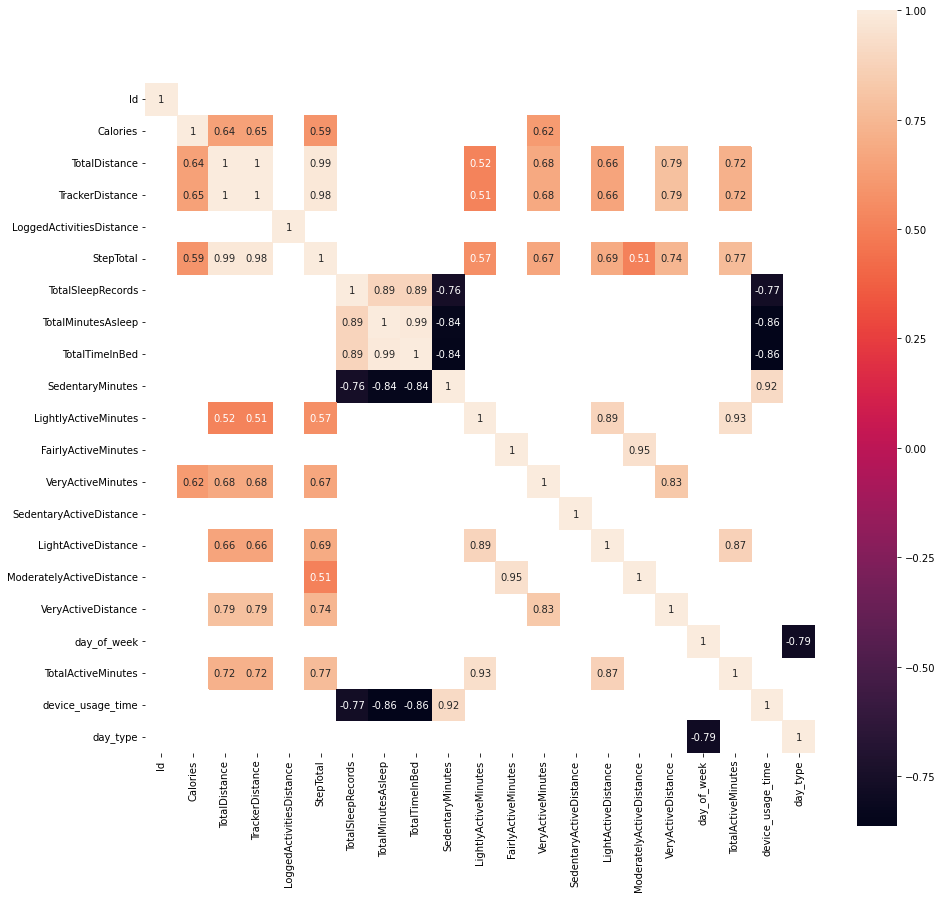

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(top_features, vmax=1, annot=True, square=True);
plt.show()

### What factors contribute to highest daily `calories` burn?
It is useful to establish a correlation between the Calories burn and other variables.






In [ ]:
calories_daily = daily_df._get_numeric_data()
calories_corr = calories_daily.corr()['Calories'][:-1] 
top_features = calories_corr[abs(calories_corr) > 0.5].sort_values(ascending=False)
print('There are {} strongly correlated values with Calories burn:\n{}'.format(len(top_features),top_features))

There is 5 strongly correlated values with Calories burn:
Calories             1.000000
TrackerDistance      0.645313
TotalDistance        0.644962
VeryActiveMinutes    0.615838
StepTotal            0.591568
Name: Calories, dtype: float64


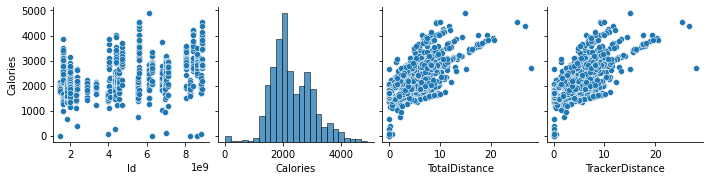

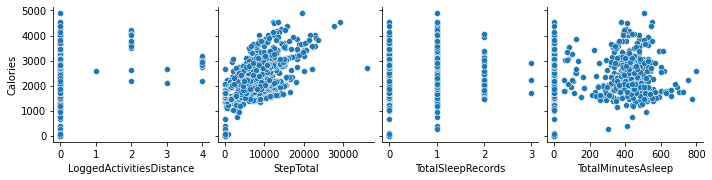

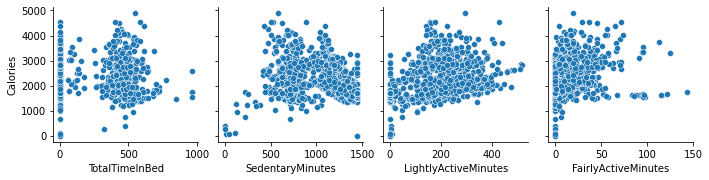

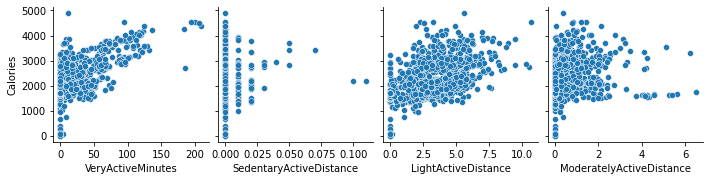

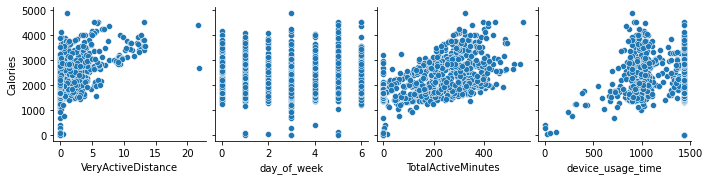

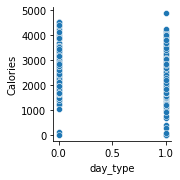

In [ ]:
for i in range(0, len(calories_daily.columns), 4):
    sns.pairplot(data=calories_daily,
                x_vars=calories_daily.columns[i:i+4],
                y_vars=['Calories'])

From Pearsons Correlation Coefficients and pair plots, we can draw some conclusions about the features that are most positively correlated to `Calories`. They are: `TrackerDistance`, `TotalDistance`, `VeryActiveMinutes`, `StepTotal`.

Which is obvious - the more active we are, the more calories we burn

### What features contribute to high `TotalMinutesAsleep`

In [ ]:
total_minutes_asleep = daily_df._get_numeric_data()
sleep_corr = total_minutes_asleep.corr()['TotalMinutesAsleep'][:-1] 
top_features = sleep_corr[abs(sleep_corr) > 0.5].sort_values(ascending=False)
print('There is {} strongly correlated values with TotalMinutiesAsleep:\n{}'.format(len(top_features),top_features))

There is 5 strongly correlated values with TotalMinutiesAsleep:
TotalMinutesAsleep    1.000000
TotalTimeInBed        0.991481
TotalSleepRecords     0.887772
SedentaryMinutes     -0.840102
device_usage_time    -0.858307
Name: TotalMinutesAsleep, dtype: float64


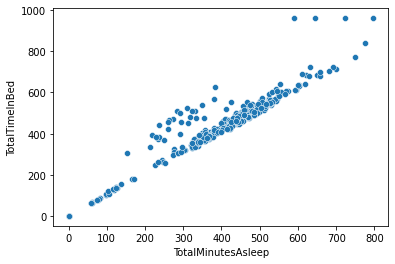

In [ ]:
sns.scatterplot(x='TotalMinutesAsleep',y='TotalTimeInBed',data=daily_df)

The relationship between TotalTimeInBed and TotalminutesAsleep are linear. The more total time users are in bed, the more minutes users as sleep. Therefore, if the users want to improve their sleep, they should condider using notification to go to sleep.

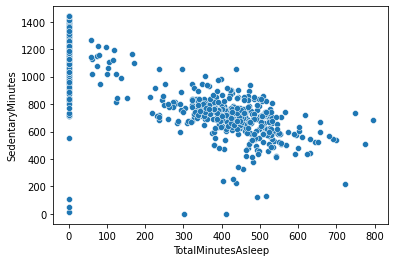

In [ ]:
sns.scatterplot(x='TotalMinutesAsleep',y='SedentaryMinutes',data=daily_df)

There is negative correlation between `TotalMinutesAsleep` and `SedentaryMinutes`. Which is means users likely sleep less in a very sedentary day

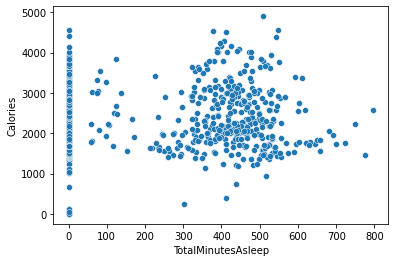

In [ ]:
sns.scatterplot(x='TotalMinutesAsleep',y='Calories',data=daily_df)

# Analysis

In [ ]:
!pip install -U scipy
import scipy.stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.8 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind, ttest_rel
from scipy.stats import f_oneway

##  Activity Minutes

In `daily_df` there are four measures of how users spend their time:

* `VeryActiveMinutes` that lead to `VeryActiveDistance`
* `FairlyActiveMinutes` that lead to `ModeratelyActiveDistance`
* `VeryLightlyActiveMinutes` that lead to `LightActiveDistance`
* `SedentaryMinutes` that lead to `SedentaryActiveDistance`

### The correlation between `ActiveDistance` and `ActiveMinutes`

Text(0.5, 1.0, 'Sedentary Active Distance & Sedentary Minutes')

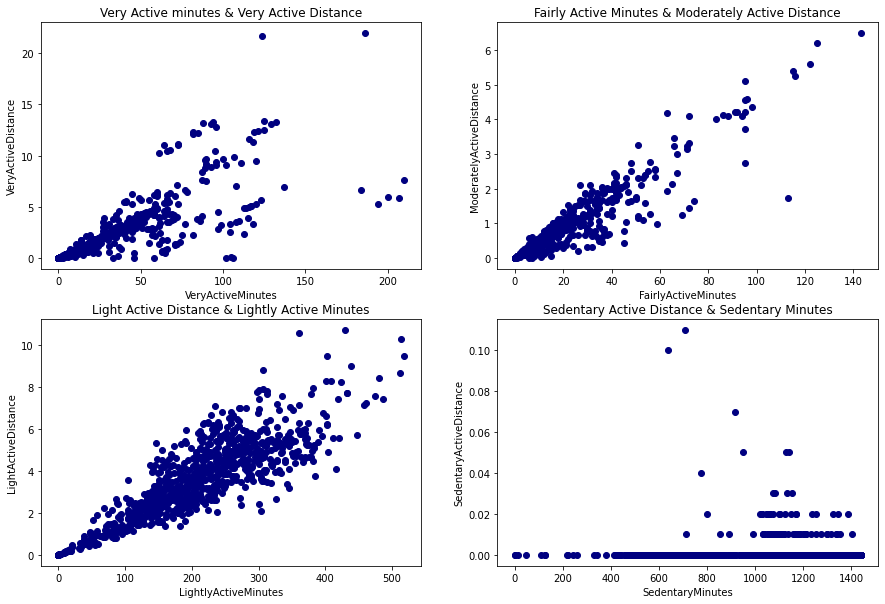

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,10))
ax1.scatter(x='VeryActiveMinutes', y='VeryActiveDistance',data=daily_df,color='navy')
ax1.set_xlabel('VeryActiveMinutes')
ax1.set_ylabel('VeryActiveDistance')
ax1.set_title('Very Active minutes & Very Active Distance')

ax2.scatter(x='FairlyActiveMinutes', y='ModeratelyActiveDistance',data=daily_df,color='navy')
ax2.set_xlabel('FairlyActiveMinutes')
ax2.set_ylabel('ModeratelyActiveDistance')
ax2.set_title('Fairly Active Minutes & Moderately Active Distance')

ax3.scatter( x='LightlyActiveMinutes',y='LightActiveDistance',data=daily_df,color='navy')
ax3.set_xlabel('LightlyActiveMinutes')
ax3.set_ylabel('LightActiveDistance')
ax3.set_title('Light Active Distance & Lightly Active Minutes')

ax4.scatter( x='SedentaryMinutes', y='SedentaryActiveDistance',data=daily_df,color='navy')
ax4.set_xlabel('SedentaryMinutes')
ax4.set_ylabel('SedentaryActiveDistance')
ax4.set_title('Sedentary Active Distance & Sedentary Minutes')


Observation:

* During **very active activity**,  users travelled long kilometer in a very short time.This means customers have highly active speeds  when they are very active

* During light active activity, users travelled less in a longer minutes

* Users spend more minutes sedentary. They travel short distances or they barely travel at all.


### The daily activity level distribution. Which daily activity level is spend more minutes by users
All users spend their daily time between four types of activity:
* `SedentaryMinutes`
* `VeryActiveMinutes`
* `FairlyActiveMinutes`
* `LightlyActiveMinutes`

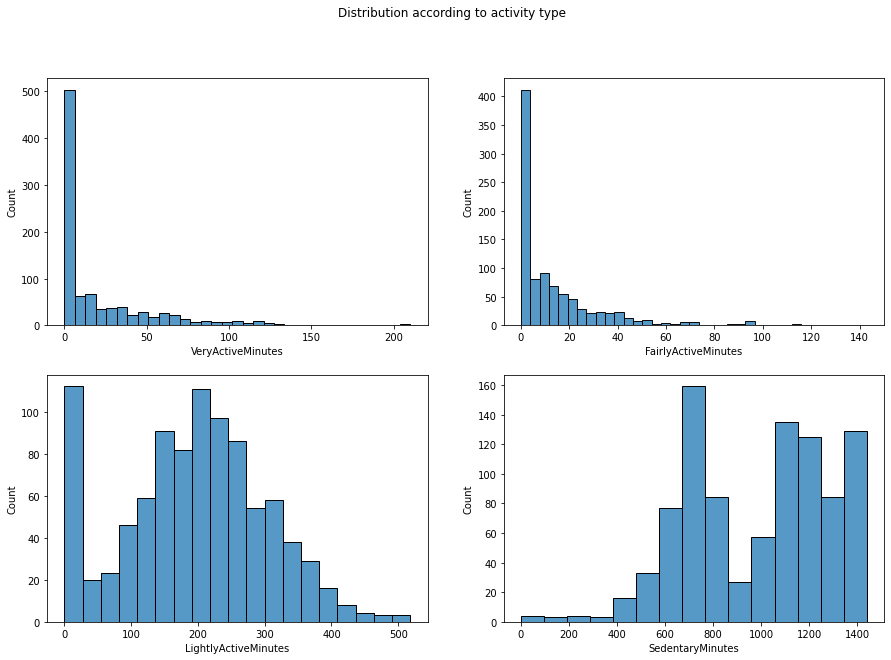

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Distribution according to activity type')

sns.histplot(data=daily_df, x='VeryActiveMinutes', ax=ax1)

sns.histplot(data=daily_df, x='FairlyActiveMinutes', ax=ax2)

sns.histplot(data=daily_df, x='LightlyActiveMinutes', ax=ax3)

sns.histplot(data=daily_df, x='SedentaryMinutes', ax=ax4)

Observation: 

- A greate number of users spend every minutes for sedentary and lightly active. It seems that  the better part of the users are mostly sedentary or lightly active users.

- Users spent average  16.7 hours in sedentary , average 3 hours in light active level,average 15 minutes in moderate level, and 19 minutes in very active level.
- spent time seated the most on Mondays, while least on Saturdays.
was the most active on Saturday and the least on Sundays.


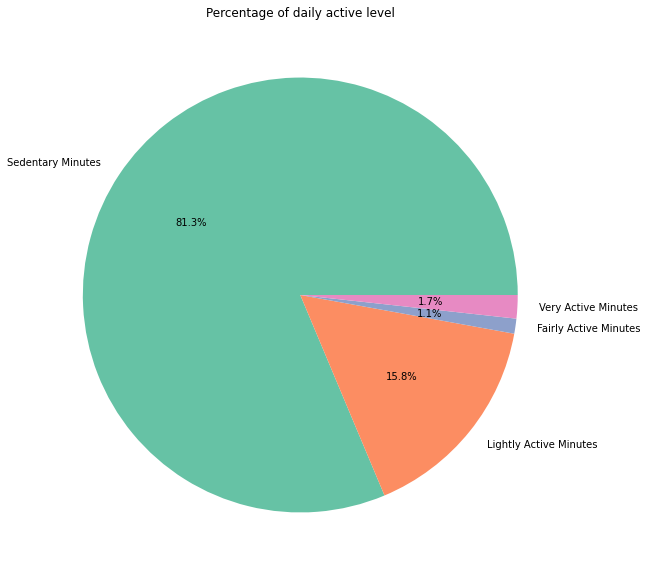

In [ ]:
sedentary_active = daily_df['SedentaryMinutes'].sum()
lightly_active = daily_df['LightlyActiveMinutes'].sum()
fairly_active = daily_df['FairlyActiveMinutes'].sum()
very_active = daily_df['VeryActiveMinutes'].sum()

# plotting the pie chart
slices = [sedentary_active,lightly_active,fairly_active,very_active]
labels = ['Sedentary Minutes','Lightly Active Minutes','Fairly Active Minutes','Very Active Minutes']
color = sns.color_palette("Set2")[0:4]
plt.figure(figsize=(10,10))
plt.pie(slices, labels=labels,colors=color,autopct = "%1.1f%%")
plt.title('Percentage of daily active level')
plt.show()

Sedentary minutes takes the biggest slice at 81.3% of total daily activity level. Lightly active level making up 15.8% of total daily activity level.

### Sedentary Activity

#### How total `Sedentary Minutes` active level changes in the week?

Text(0.5, 1.0, 'Total sedentary active level changes across all week')

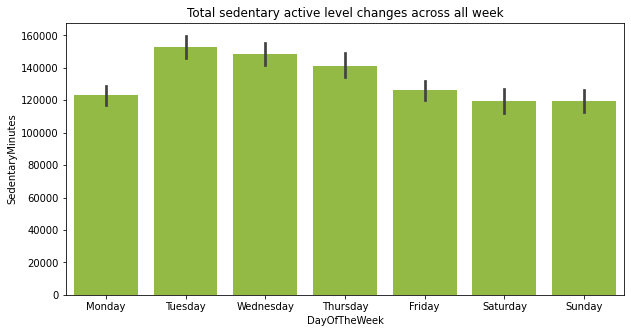

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='DayOfTheWeek', y='SedentaryMinutes', data=daily_df, estimator=np.sum, color='yellowgreen',
            order=('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
plt.title('Total sedentary active level changes across all week')

Tuesday has the highest total minutes spent in sedentary activity. The total minutes spent in sedentary dropped from Wed to Monday

Text(0.5, 1.0, 'Total sedentary active level changes across all week')

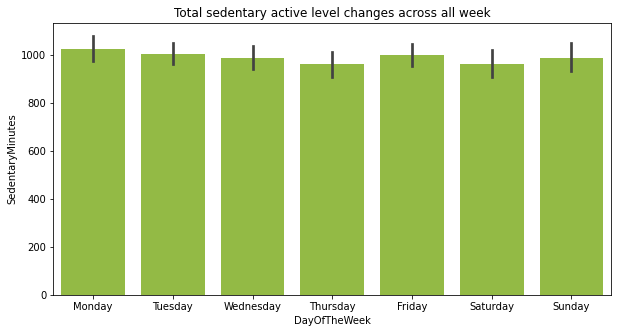

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='DayOfTheWeek', y='SedentaryMinutes', data=daily_df, estimator=np.mean, color='yellowgreen',
            order=('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
plt.title('Total sedentary active level changes across all week')

There is a minimal different between average sendentary minuties between days of the week

#### Is it day of week affect on `Sendentary` active level?
* H_0 = µ_Mon = µ_Tue = µ_Wed = µ_Thurs = µ_Fri = µ_Sat
* H_1 : At least one of the means differ

-> Since the p-value is not less than .05, we fail to reject the null hypothesis.

-> This means we do not have sufficient evidence to say that there is a difference in sedentary active minutes during the day of the week.

In [ ]:
sedentary_monday = daily_df[daily_df['day_of_week'] == 0]['SedentaryMinutes'] #Monday
sedentary_tue = daily_df[daily_df['day_of_week'] == 1]['SedentaryMinutes'] #Tue
sedentary_wed = daily_df[daily_df['day_of_week'] == 2]['SedentaryMinutes'] #Wed
sedentary_thurs = daily_df[daily_df['day_of_week'] == 3]['SedentaryMinutes'] #Thurs
sedentary_fri = daily_df[daily_df['day_of_week'] == 4]['SedentaryMinutes'] #Fri
sedentary_sat = daily_df[daily_df['day_of_week'] == 5]['SedentaryMinutes'] #Sat
sedentary_sun = daily_df[daily_df['day_of_week'] == 6]['SedentaryMinutes'] #Sun

In [ ]:
anova_result_2 = f_oneway(sedentary_monday,sedentary_tue,sedentary_wed,sedentary_thurs,sedentary_fri,sedentary_sat,sedentary_sun)
anova_result_2

F_onewayResult(statistic=0.7847597172405633, pvalue=0.581933170246636)

### Total Active Minutes

`LightlyActiveMinutes` + `FairlyActiveMinutes` + `VeryActiveMinutes`

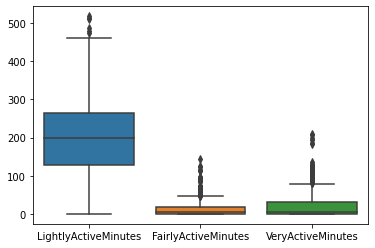

In [ ]:
activity = daily_df[['LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes']]
sns.boxplot(data=activity)

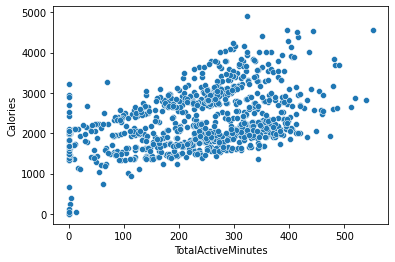

In [ ]:
sns.scatterplot(x='TotalActiveMinutes',y='Calories', data=daily_df)

The most common level of activity during excercise is light. The more total active minutes, the higher the calories burnt

#### How does daily active change in week?

In [ ]:
total_active_allweek = daily_df.groupby('DayOfTheWeek').TotalActiveMinutes.sum()
total_active_allweek

DayOfTheWeek
Friday       29782
Monday       27500
Saturday     30289
Sunday       25227
Thursday     31868
Tuesday      35664
Wednesday    33560
Name: TotalActiveMinutes, dtype: Int64

Text(0.5, 1.0, 'Total Active Minutes users track in app across all week')

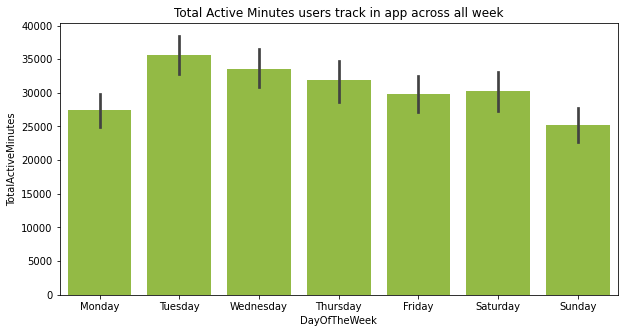

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='DayOfTheWeek', y='TotalActiveMinutes', data=daily_df, estimator=np.sum, color='yellowgreen',
            order=('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
plt.title('Total Active Minutes users track in app across all week')

In [ ]:
activity = daily_df.groupby(['DayOfTheWeek'])[['LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes']].sum()
activity

,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
DayOfTheWeek,,,
Friday,25729,1526,2527
Monday,23047,1680,2773
Saturday,25686,1885,2718
Sunday,21051,1758,2418
Thursday,27257,1758,2853
Tuesday,29996,2179,3489
Wednesday,28478,1965,3117


Text(0.5, 1.0, 'Total very active minutes tracked by users across all week')

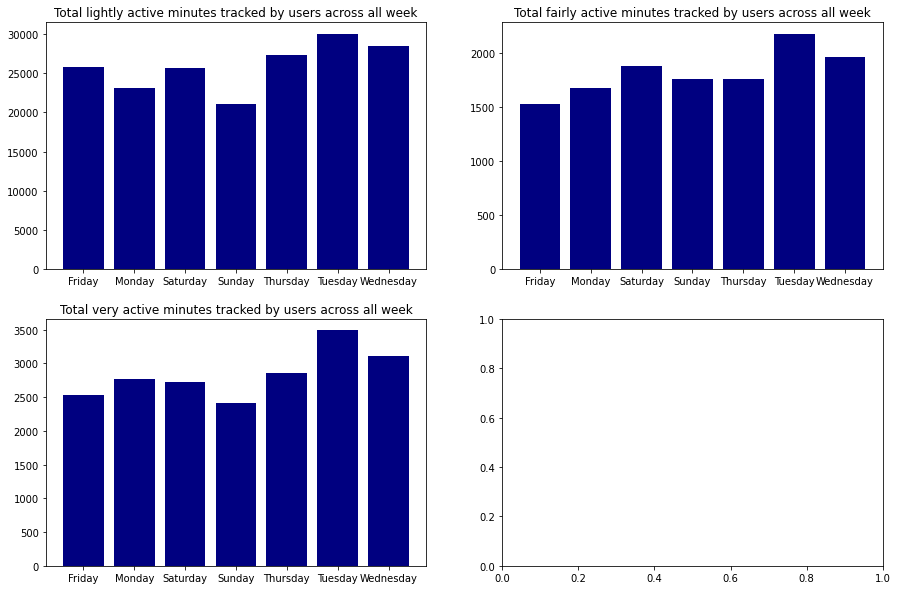

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,10))


ax1.bar(x=activity.index, height='LightlyActiveMinutes',data=activity,color='navy')
ax1.set_title('Total lightly active minutes tracked by users across all week')

ax2.bar(x=activity.index, height='FairlyActiveMinutes',data=activity,color='navy')
ax2.set_title('Total fairly active minutes tracked by users across all week')

ax3.bar(x=activity.index, height='VeryActiveMinutes',data=activity,color='navy')
ax3.set_title('Total very active minutes tracked by users across all week')

Users frequently track their activity on the app from Tuesday to Thursday.
The frequency dropped on Friday and continue on weekends and Monday

In [ ]:
daily_df.head()

,Id,Calories,ActivityDate,TotalDistance,TrackerDistance,LoggedActivitiesDistance,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,...,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,day_of_week,DayOfTheWeek,TotalActiveMinutes,device_usage_time,day_type
0,1503960366,1985,2016-04-12,8.50,8.50,0,13162,1,327,346,...,25,0.0,6.06,0.55,1.88,1,Tuesday,366,1094,1.0
1,1503960366,1797,2016-04-13,6.97,6.97,0,10735,2,384,407,...,21,0.0,4.71,0.69,1.57,2,Wednesday,257,1033,1.0
2,1503960366,1776,2016-04-14,6.74,6.74,0,10460,0,0,0,...,30,0.0,3.91,0.40,2.44,3,Thursday,222,1440,1.0
3,1503960366,1745,2016-04-15,6.28,6.28,0,9762,1,412,442,...,29,0.0,2.83,1.26,2.14,4,Friday,272,998,1.0
4,1503960366,1863,2016-04-16,8.16,8.16,0,12669,2,340,367,...,36,0.0,5.04,0.41,2.71,5,Saturday,267,1040,0.0


In [ ]:
activity_mean = daily_df.groupby(['DayOfTheWeek'])[['SedentaryMinutes','LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes']].mean()
activity_mean

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
DayOfTheWeek,,,,
Friday,1000.309524,204.198413,12.111111,20.055556
Monday,1027.941667,192.058333,14.0,23.108333
Saturday,964.282258,207.145161,15.201613,21.919355
Sunday,990.256198,173.975207,14.528926,19.983471
Thursday,961.993197,185.421769,11.959184,19.408163
Tuesday,1007.361842,197.342105,14.335526,22.953947
Wednesday,989.48,189.853333,13.1,20.78


Text(0.5, 1.0, 'AVG very active minutes tracked by users across all week')

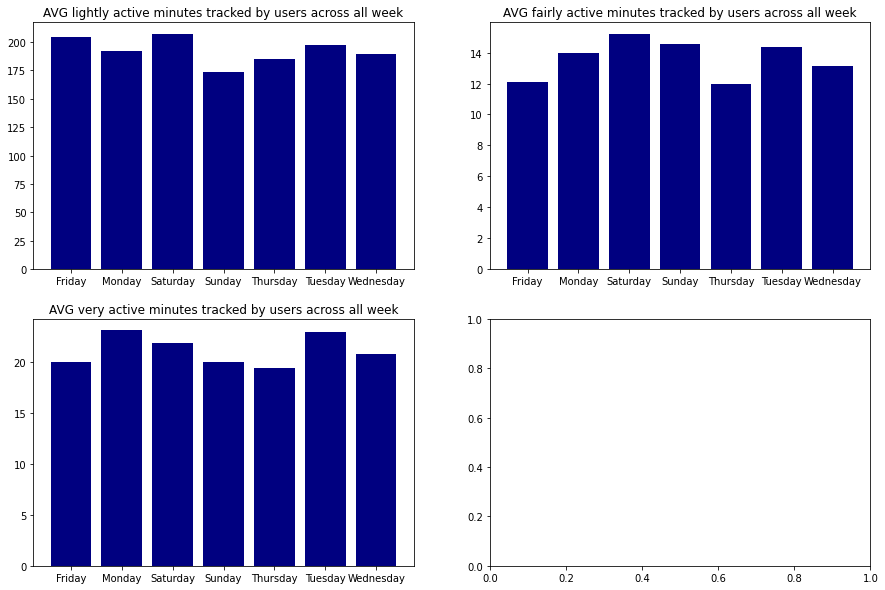

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,10))


ax1.bar(x=activity_mean.index, height='LightlyActiveMinutes',data=activity_mean,color='navy')
ax1.set_title('AVG lightly active minutes tracked by users across all week')

ax2.bar(x=activity_mean.index, height='FairlyActiveMinutes',data=activity_mean,color='navy')
ax2.set_title('AVG fairly active minutes tracked by users across all week')

ax3.bar(x=activity_mean.index, height='VeryActiveMinutes',data=activity_mean,color='navy')
ax3.set_title('AVG very active minutes tracked by users across all week')

#### Is it weekend affects on total minutes active?

In [ ]:
daily_df.columns

Index(['Id', 'Calories', 'ActivityDate', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'StepTotal', 'TotalSleepRecords',
       'TotalMinutesAsleep', 'TotalTimeInBed', 'SedentaryMinutes',
       'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes',
       'SedentaryActiveDistance', 'LightActiveDistance',
       'ModeratelyActiveDistance', 'VeryActiveDistance', 'day_of_week',
       'DayOfTheWeek', 'TotalActiveMinutes', 'device_usage_time', 'day_type'],
      dtype='object')

##### T-test
* H0: TotalActiveMinutes_weekday = TotalActiveMinutes_weekend

* H1: TotalActiveMinutes_weekday # TotalActiveMinutes_weekend

In [ ]:
active_minutes_weekday = daily_df[daily_df['day_type'] == 1]['TotalActiveMinutes']
active_minutes_weekend = daily_df[daily_df['day_type'] == 0]['TotalActiveMinutes']

In [ ]:
ttest_result_2 = ttest_ind(a=active_minutes_weekday, b=active_minutes_weekend, equal_var=False,alternative='two-sided')
ttest_result_2

Ttest_indResult(statistic=0.1360425117799783, pvalue=0.8918561916606966)

In [ ]:
ttest_result_2.pvalue

if ttest_result_2.pvalue < 0.05:
  print('reject H0 ')
else:
  print('Fail to reject H0')

Fail to reject H0


<BarContainer object of 2 artists>

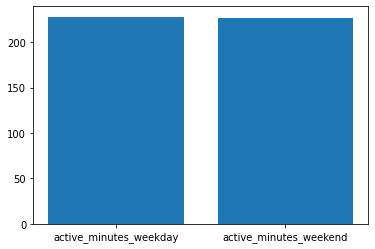

In [ ]:
x_label = ['active_minutes_weekday','active_minutes_weekend']
y_label = [active_minutes_weekday.mean(),
           active_minutes_weekend.mean()
           ]
plt.bar(x_label, y_label)


##### ANOVA Testing
* H_0 = µ_Mon = µ_Tue = µ_Wed = µ_Thurs = µ_Fri = µ_Sat
* H_1 : At least one of the means differ

In [ ]:
active_monday = daily_df[daily_df['day_of_week'] == 0]['TotalActiveMinutes'] #Monday
active_tue = daily_df[daily_df['day_of_week'] == 1]['TotalActiveMinutes'] #Tue
active_wed = daily_df[daily_df['day_of_week'] == 2]['TotalActiveMinutes'] #Wed
active_thurs = daily_df[daily_df['day_of_week'] == 3]['TotalActiveMinutes'] #Thurs
active_fri = daily_df[daily_df['day_of_week'] == 4]['TotalActiveMinutes'] #Fri
active_sat = daily_df[daily_df['day_of_week'] == 5]['TotalActiveMinutes'] #Sat
active_sun = daily_df[daily_df['day_of_week'] == 6]['TotalActiveMinutes'] #Sun

In [ ]:
anova_result_1 = f_oneway(active_monday,active_tue,active_wed,active_thurs,active_fri,active_sat,active_sun)
anova_result_1

F_onewayResult(statistic=1.3011724933746243, pvalue=0.2538035535113428)

#### Is it days of week affects on `LightlyActiveMinutes` & `FairlyActiveMinutes` & `VeryActiveMinutes`?

In [ ]:
light_monday = daily_df[daily_df['day_of_week'] == 0]['LightlyActiveMinutes'] #Monday
light_tue = daily_df[daily_df['day_of_week'] == 1]['LightlyActiveMinutes'] #Tue
light_wed = daily_df[daily_df['day_of_week'] == 2]['LightlyActiveMinutes'] #Wed
light_thurs = daily_df[daily_df['day_of_week'] == 3]['LightlyActiveMinutes'] #Thurs
light_fri = daily_df[daily_df['day_of_week'] == 4]['LightlyActiveMinutes'] #Fri
light_sat = daily_df[daily_df['day_of_week'] == 5]['LightlyActiveMinutes'] #Sat
light_sun = daily_df[daily_df['day_of_week'] == 6]['LightlyActiveMinutes'] #Sun

In [ ]:
anova_result_light = f_oneway(light_monday,light_tue,light_wed,light_thurs,light_fri,light_sat,light_sun)
anova_result_light

F_onewayResult(statistic=1.3633437539183075, pvalue=0.22648436550270953)

In [ ]:
very_monday = daily_df[daily_df['DayOfTheWeek'] == 'Monday']['VeryActiveMinutes'] #Monday
very_tue = daily_df[daily_df['DayOfTheWeek'] == 'Tuesday']['VeryActiveMinutes'] #Tue
very_wed = daily_df[daily_df['DayOfTheWeek'] == 'Wednesday']['VeryActiveMinutes'] #Wed
very_thurs = daily_df[daily_df['DayOfTheWeek'] == 'Thursday']['VeryActiveMinutes'] #Thurs
very_fri = daily_df[daily_df['DayOfTheWeek'] == 'Friday']['VeryActiveMinutes'] #Fri
very_sat = daily_df[daily_df['DayOfTheWeek'] == 'Saturday']['VeryActiveMinutes'] #Sat
very_sun = daily_df[daily_df['DayOfTheWeek'] == 'Sunday']['VeryActiveMinutes'] #Sun

In [ ]:
anova = f_oneway(very_monday,very_tue,very_wed,very_thurs,very_fri,very_sat,very_sun)
anova

F_onewayResult(statistic=0.27837029949914593, pvalue=0.9472394597864391)

In [ ]:
fairly_monday = daily_df[daily_df['day_of_week'] == 0]['FairlyActiveMinutes'] #Monday
fairly_tue = daily_df[daily_df['day_of_week'] == 1]['FairlyActiveMinutes'] #Tue
fairly_wed = daily_df[daily_df['day_of_week'] == 2]['FairlyActiveMinutes'] #Wed
fairly_thurs = daily_df[daily_df['day_of_week'] == 3]['FairlyActiveMinutes'] #Thurs
fairly_fri = daily_df[daily_df['day_of_week'] == 4]['FairlyActiveMinutes'] #Fri
fairly_sat = daily_df[daily_df['day_of_week'] == 5]['FairlyActiveMinutes'] #Sat
fairly_sun = daily_df[daily_df['day_of_week'] == 6]['FairlyActiveMinutes'] #Sun

In [ ]:
anova_result_fairly = f_oneway(fairly_monday,fairly_tue,fairly_wed,fairly_thurs,fairly_fri,fairly_sat,fairly_sun)
anova_result_fairly

F_onewayResult(statistic=0.5137749874539002, pvalue=0.7982122853081477)

### Whether or not the calories burn is influenced by four levels of active: `SedentaryMinutes` `LightlyActiveMinutes` `FairlyActiveMinutes` `VeryActiveMinutes`

In [ ]:
testing_anova = daily_df[['Calories','SedentaryMinutes','LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes']]

In [ ]:
testing_anova.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 942
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Calories              940 non-null    Int64
 1   SedentaryMinutes      940 non-null    Int64
 2   LightlyActiveMinutes  940 non-null    Int64
 3   FairlyActiveMinutes   940 non-null    Int64
 4   VeryActiveMinutes     940 non-null    Int64
dtypes: Int64(5)
memory usage: 80.9 KB


In [ ]:
testing_anova = testing_anova.astype('float')

In [ ]:
testing_anova.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 942
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Calories              940 non-null    float64
 1   SedentaryMinutes      940 non-null    float64
 2   LightlyActiveMinutes  940 non-null    float64
 3   FairlyActiveMinutes   940 non-null    float64
 4   VeryActiveMinutes     940 non-null    float64
dtypes: float64(5)
memory usage: 76.4 KB


In [ ]:
testing_anova.corr()

,Calories,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
Calories,1.000000,-0.106973,0.286718,0.297623,0.615838
SedentaryMinutes,-0.106973,1.000000,-0.437104,-0.237446,-0.164671
LightlyActiveMinutes,0.286718,-0.437104,1.000000,0.148820,0.051926
FairlyActiveMinutes,0.297623,-0.237446,0.148820,1.000000,0.312420
VeryActiveMinutes,0.615838,-0.164671,0.051926,0.312420,1.000000


In [ ]:
model = ols("""Calories ~ SedentaryMinutes + LightlyActiveMinutes + FairlyActiveMinutes + VeryActiveMinutes +
                SedentaryMinutes:LightlyActiveMinutes + SedentaryMinutes:FairlyActiveMinutes + SedentaryMinutes:VeryActiveMinutes +
                SedentaryMinutes:LightlyActiveMinutes:FairlyActiveMinutes:VeryActiveMinutes""",data = testing_anova).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
SedentaryMinutes,8.219082e+06,1.0,31.036645,3.314346e-08
LightlyActiveMinutes,3.602892e+07,1.0,136.051291,1.937681e-29
FairlyActiveMinutes,4.216161e+06,1.0,15.920940,7.123054e-05
VeryActiveMinutes,1.578579e+08,1.0,596.098337,3.774724e-102
SedentaryMinutes:LightlyActiveMinutes,5.534276e+06,1.0,20.898366,5.495931e-06
SedentaryMinutes:FairlyActiveMinutes,3.151218e+06,1.0,11.899535,5.866752e-04
SedentaryMinutes:VeryActiveMinutes,2.319258e+06,1.0,8.757911,3.160705e-03
SedentaryMinutes:LightlyActiveMinutes:FairlyActiveMinutes:VeryActiveMinutes,3.045503e+06,1.0,11.500337,7.251097e-04
Residual,2.465461e+08,931.0,NaN,NaN


#### **Observation:** Since the p-values of all factors are less than 0.05, this means that each of the four factors have statistically significant effect on the calories burned.They are all significant predictors of the Calories. Specifically, `VeryActiveMinutes` and `LightlyActiveMinutes` have the highest  statistically significant effect on the calories burned. Therefore, the more users stay at a very active level or lightly active, the more calories burned.

### And since the p-value for interaction effect of all factors are less than .05, this tell us that there are significant interaction effect between these four factors

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Intensity activity

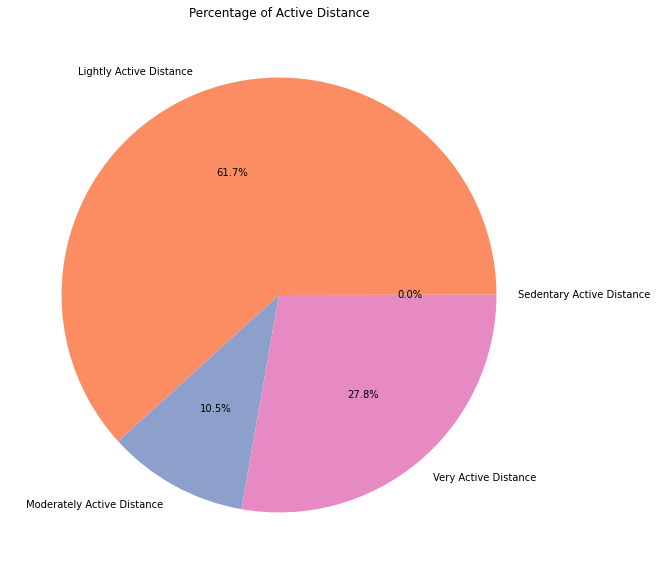

In [ ]:
sedentary_active_distance = daily_df['SedentaryActiveDistance'].sum()
lightly_active_distance = daily_df['LightActiveDistance'].sum()
moderate_active_distance = daily_df['ModeratelyActiveDistance'].sum()
very_active_distance = daily_df['VeryActiveDistance'].sum()

slices = [sedentary_active_distance,lightly_active_distance,moderate_active_distance,very_active_distance]
labels = ['Sedentary Active Distance','Lightly Active Distance','Moderately Active Distance','Very Active Distance']
color = sns.color_palette("Set2")[0:4]
plt.figure(figsize=(10,10))
plt.pie(slices, labels=labels,colors=color,autopct = "%1.1f%%")
plt.title('Percentage of Active Distance')
plt.show()

### The frequency of customers active distance across the week

Text(0.5, 1.0, 'Total Distance users track in app across all week')

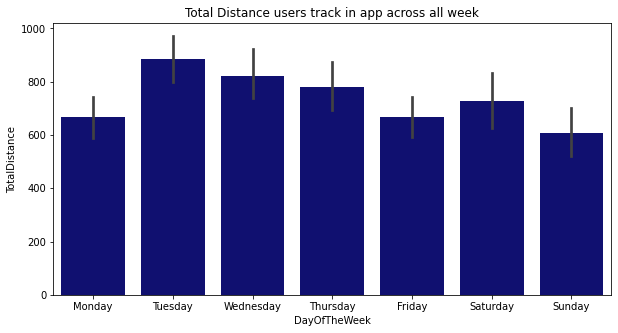

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='DayOfTheWeek', y='TotalDistance', data=daily_df, estimator=np.sum, color='navy', order=('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
plt.title('Total Distance users track in app across all week')

In [ ]:
distance = daily_df.groupby(['DayOfTheWeek'])[['SedentaryActiveDistance','LightActiveDistance','ModeratelyActiveDistance','VeryActiveDistance']].mean()
distance 

,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
DayOfTheWeek,,,,
Friday,0.001825,3.489127,0.483810,1.312937
Monday,0.002583,3.363083,0.585833,1.537333
Saturday,0.001048,3.617177,0.677339,1.514597
Sunday,0.000661,2.892314,0.618017,1.488926
Thursday,0.002313,3.283129,0.505170,1.390476
Tuesday,0.001447,3.471053,0.593026,1.613289
Wednesday,0.001333,3.256333,0.527067,1.633467


Text(0.5, 1.0, 'AVG Very Active Distance tracked by users across all week')

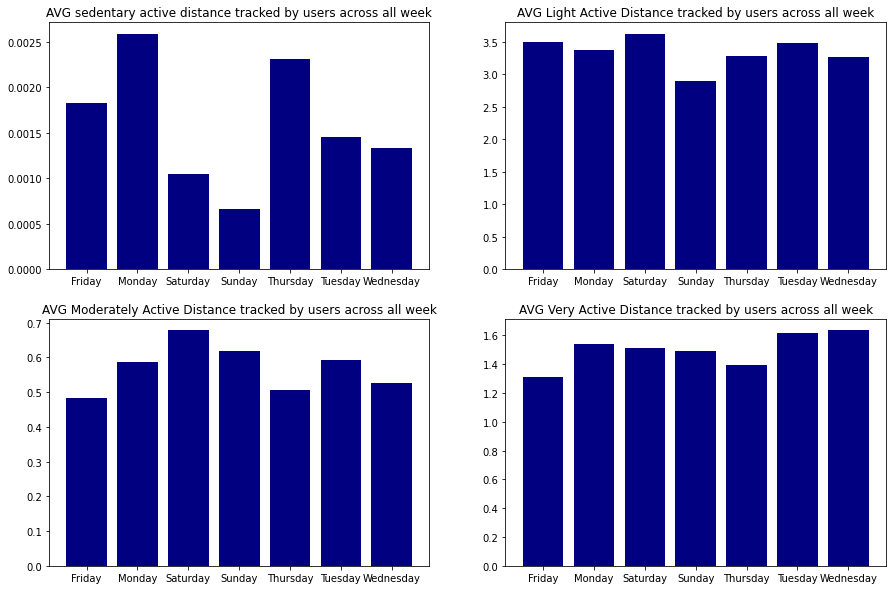

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,10))

ax1.bar(x=distance.index, height='SedentaryActiveDistance',data=distance,color='navy')
ax1.set_title('AVG sedentary active distance tracked by users across all week')

ax2.bar(x=distance.index, height='LightActiveDistance',data=distance,color='navy')
ax2.set_title('AVG Light Active Distance tracked by users across all week')

ax3.bar(x=distance.index, height='ModeratelyActiveDistance',data=distance,color='navy')
ax3.set_title('AVG Moderately Active Distance tracked by users across all week')

ax4.bar(x=distance.index, height='VeryActiveDistance',data=distance,color='navy')
ax4.set_title('AVG Very Active Distance tracked by users across all week')

### Is it days of week affects on `SedentaryActiveDistance` & `LightActiveDistance` & `VeryActiveDistance` & `ModeratelyActiveDistance`?

In [ ]:
seden_monday = daily_df[daily_df['day_of_week'] == 0]['SedentaryActiveDistance'] #Monday
seden_tue = daily_df[daily_df['day_of_week'] == 1]['SedentaryActiveDistance'] #Tue
seden_wed = daily_df[daily_df['day_of_week'] == 2]['SedentaryActiveDistance'] #Wed
seden_thurs = daily_df[daily_df['day_of_week'] == 3]['SedentaryActiveDistance'] #Thurs
seden_fri = daily_df[daily_df['day_of_week'] == 4]['SedentaryActiveDistance'] #Fri
seden_sat = daily_df[daily_df['day_of_week'] == 5]['SedentaryActiveDistance'] #Sat
seden_sun = daily_df[daily_df['day_of_week'] == 6]['SedentaryActiveDistance'] #Sun

anova_1 = f_oneway(seden_monday,seden_tue,seden_wed,seden_thurs,seden_fri,seden_sat,seden_sun)
anova_1

F_onewayResult(statistic=1.0992259790505325, pvalue=0.36081166742076953)

In [ ]:
light_monday = daily_df[daily_df['day_of_week'] == 0]['LightActiveDistance'] #Monday
light_tue = daily_df[daily_df['day_of_week'] == 1]['LightActiveDistance'] #Tue
light_wed = daily_df[daily_df['day_of_week'] == 2]['LightActiveDistance'] #Wed
light_thurs = daily_df[daily_df['day_of_week'] == 3]['LightActiveDistance'] #Thurs
light_fri = daily_df[daily_df['day_of_week'] == 4]['LightActiveDistance'] #Fri
light_sat = daily_df[daily_df['day_of_week'] == 5]['LightActiveDistance'] #Sat
light_sun = daily_df[daily_df['day_of_week'] == 6]['LightActiveDistance'] #Sun

anova_light = f_oneway(light_monday,light_tue,light_wed,light_thurs,light_fri,light_sat,light_sun)
anova_light

F_onewayResult(statistic=1.6387651390229896, pvalue=0.13323837087119675)

In [ ]:
mo_monday = daily_df[daily_df['day_of_week'] == 0]['ModeratelyActiveDistance'] #Monday
mo_tue = daily_df[daily_df['day_of_week'] == 1]['ModeratelyActiveDistance'] #Tue
mo_wed = daily_df[daily_df['day_of_week'] == 2]['ModeratelyActiveDistance'] #Wed
mo_thurs = daily_df[daily_df['day_of_week'] == 3]['ModeratelyActiveDistance'] #Thurs
mo_fri = daily_df[daily_df['day_of_week'] == 4]['ModeratelyActiveDistance'] #Fri
mo_sat = daily_df[daily_df['day_of_week'] == 5]['ModeratelyActiveDistance'] #Sat
mo_sun = daily_df[daily_df['day_of_week'] == 6]['ModeratelyActiveDistance'] #Sun

anova_mo = f_oneway(mo_monday,mo_tue,mo_wed,mo_thurs,mo_fri,mo_sat,mo_sun)
anova_mo

F_onewayResult(statistic=0.7765968372095434, pvalue=0.5883717905681818)

In [ ]:
very_monday = daily_df[daily_df['day_of_week'] == 0]['VeryActiveDistance'] #Monday
very_tue = daily_df[daily_df['day_of_week'] == 1]['VeryActiveDistance'] #Tue
very_wed = daily_df[daily_df['day_of_week'] == 2]['VeryActiveDistance'] #Wed
very_thurs = daily_df[daily_df['day_of_week'] == 3]['VeryActiveDistance'] #Thurs
very_fri = daily_df[daily_df['day_of_week'] == 4]['VeryActiveDistance'] #Fri
very_sat = daily_df[daily_df['day_of_week'] == 5]['VeryActiveDistance'] #Sat
very_sun = daily_df[daily_df['day_of_week'] == 6]['VeryActiveDistance'] #Sun

anova_very = f_oneway(very_monday,very_tue,very_wed,very_thurs,very_fri,very_sat,very_sun)
anova_very

F_onewayResult(statistic=0.25801357607674974, pvalue=0.9560966034212406)

### Whether or not the calories burn is infulenced by four factors: `SedentaryActiveDistance`	`LightActiveDistance`	`ModeratelyActiveDistance`	`VeryActiveDistance`

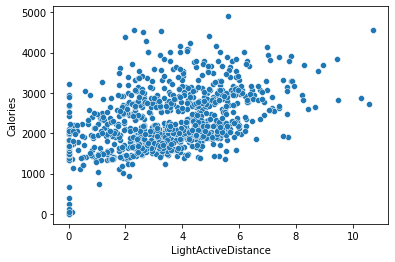

In [ ]:
sns.scatterplot(x='LightActiveDistance',y='Calories',data=daily_df)

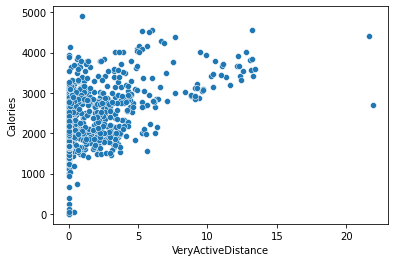

In [ ]:
sns.scatterplot(x='VeryActiveDistance',y='Calories',data=daily_df)

In [ ]:
testing_anova_distance = daily_df[['Calories','SedentaryActiveDistance','LightActiveDistance','ModeratelyActiveDistance','VeryActiveDistance']]

In [ ]:
testing_anova_distance = testing_anova_distance.astype('float')

In [ ]:
model_1 = ols(""" Calories ~ SedentaryActiveDistance + LightActiveDistance + ModeratelyActiveDistance + VeryActiveDistance +
                SedentaryActiveDistance:LightActiveDistance + SedentaryActiveDistance:ModeratelyActiveDistance + SedentaryActiveDistance:VeryActiveDistance +
                SedentaryActiveDistance:LightActiveDistance:ModeratelyActiveDistance:VeryActiveDistance""",data = testing_anova_distance).fit()
sm.stats.anova_lm(model_1, typ=2)

,sum_sq,df,F,PR(>F)
SedentaryActiveDistance,1.087046e+05,1.0,0.353346,5.523695e-01
LightActiveDistance,6.503569e+07,1.0,211.399523,2.591019e-43
ModeratelyActiveDistance,1.374691e+06,1.0,4.468456,3.479159e-02
VeryActiveDistance,8.081247e+07,1.0,262.682204,3.153704e-52
SedentaryActiveDistance:LightActiveDistance,2.051462e+06,1.0,6.668308,9.965935e-03
SedentaryActiveDistance:ModeratelyActiveDistance,1.112391e+05,1.0,0.361584,5.477740e-01
SedentaryActiveDistance:VeryActiveDistance,2.842621e+06,1.0,9.239984,2.434073e-03
SedentaryActiveDistance:LightActiveDistance:ModeratelyActiveDistance:VeryActiveDistance,6.144656e+05,1.0,1.997330,1.579108e-01
Residual,2.864161e+08,931.0,NaN,NaN


Since the p-values of `lightActiveDistance` & `VeryActiveDistance` factors are less than 0.05, this means that the two factors have statistically significant effect on the calories burned.They are all significant predictors of the Calories. Therefore, the more users stay at a very active level or lightly active, the more calories burned.

## Total Steps Analysis
How does the number of steps taken in a day affect the amount of calories burned?

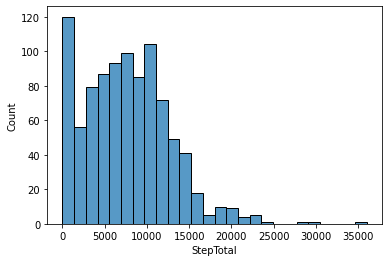

In [ ]:
sns.histplot(data=daily_df, x='StepTotal')

In [ ]:
daily_df['StepTotal'].describe()

count      940.000000
mean      7637.910638
std       5087.150742
min          0.000000
25%       3789.750000
50%       7405.500000
75%      10727.000000
max      36019.000000
Name: StepTotal, dtype: float64

In [ ]:
daily_df.head(5)

,Id,Calories,ActivityDate,TotalDistance,TrackerDistance,LoggedActivitiesDistance,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,...,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,day_of_week,DayOfTheWeek,TotalActiveMinutes,device_usage_time,day_type
0,1503960366,1985,2016-04-12,8.50,8.50,0,13162,1,327,346,...,25,0.0,6.06,0.55,1.88,1,Tuesday,366,1094,1.0
1,1503960366,1797,2016-04-13,6.97,6.97,0,10735,2,384,407,...,21,0.0,4.71,0.69,1.57,2,Wednesday,257,1033,1.0
2,1503960366,1776,2016-04-14,6.74,6.74,0,10460,0,0,0,...,30,0.0,3.91,0.40,2.44,3,Thursday,222,1440,1.0
3,1503960366,1745,2016-04-15,6.28,6.28,0,9762,1,412,442,...,29,0.0,2.83,1.26,2.14,4,Friday,272,998,1.0
4,1503960366,1863,2016-04-16,8.16,8.16,0,12669,2,340,367,...,36,0.0,5.04,0.41,2.71,5,Saturday,267,1040,0.0


The amount of calories burned in a day grows as the user take more steps

### In order to better visualize the step data I will group the total steps columns into four categories. `Less than 4,999 steps` & `5,000 to 9,999 steps` & `10,000 to 14,999 steps` & `More than 15,000 steps`

In [ ]:
daily_df.loc[(daily_df['StepTotal'] <= 4999),'four_categories_of_steps'] = 'Less than 4,999 steps'
daily_df.loc[(daily_df['StepTotal'] >=5000 ) & (daily_df['TotalMinutesAsleep'] <= 9999),'four_categories_of_steps'] = '5,000 to 9,999 steps'
daily_df.loc[(daily_df['StepTotal'] >= 10000) & (daily_df['TotalMinutesAsleep'] <= 14999),'four_categories_of_steps'] = '10,000 to 14,999 steps'
daily_df.loc[(daily_df['StepTotal'] >= 15000),'four_categories_of_steps'] = 'More than 15,000 steps'
daily_df.head(5)

,Id,Calories,ActivityDate,TotalDistance,TrackerDistance,LoggedActivitiesDistance,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,...,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,day_of_week,DayOfTheWeek,TotalActiveMinutes,device_usage_time,day_type,four_categories_of_steps
0,1503960366,1985,2016-04-12,8.50,8.50,0,13162,1,327,346,...,0.0,6.06,0.55,1.88,1,Tuesday,366,1094,1.0,"10,000 to 14,999 steps"
1,1503960366,1797,2016-04-13,6.97,6.97,0,10735,2,384,407,...,0.0,4.71,0.69,1.57,2,Wednesday,257,1033,1.0,"10,000 to 14,999 steps"
2,1503960366,1776,2016-04-14,6.74,6.74,0,10460,0,0,0,...,0.0,3.91,0.40,2.44,3,Thursday,222,1440,1.0,"10,000 to 14,999 steps"
3,1503960366,1745,2016-04-15,6.28,6.28,0,9762,1,412,442,...,0.0,2.83,1.26,2.14,4,Friday,272,998,1.0,"5,000 to 9,999 steps"
4,1503960366,1863,2016-04-16,8.16,8.16,0,12669,2,340,367,...,0.0,5.04,0.41,2.71,5,Saturday,267,1040,0.0,"10,000 to 14,999 steps"


In [ ]:
daily_df.four_categories_of_steps.value_counts()

5,000 to 9,999 steps      334
Less than 4,999 steps     303
10,000 to 14,999 steps    236
More than 15,000 steps     67
Name: four_categories_of_steps, dtype: int64

In [ ]:
daily_df.groupby('DayOfTheWeek')['four_categories_of_steps'].value_counts()

DayOfTheWeek  four_categories_of_steps
Friday        5,000 to 9,999 steps        51
              Less than 4,999 steps       42
              10,000 to 14,999 steps      26
              More than 15,000 steps       7
Monday        5,000 to 9,999 steps        45
              Less than 4,999 steps       35
              10,000 to 14,999 steps      34
              More than 15,000 steps       6
Saturday      5,000 to 9,999 steps        42
              Less than 4,999 steps       40
              10,000 to 14,999 steps      30
              More than 15,000 steps      12
Sunday        Less than 4,999 steps       48
              5,000 to 9,999 steps        40
              10,000 to 14,999 steps      23
              More than 15,000 steps      10
Thursday      Less than 4,999 steps       51
              5,000 to 9,999 steps        50
              10,000 to 14,999 steps      36
              More than 15,000 steps      10
Tuesday       5,000 to 9,999 steps        53
              10

In [ ]:
sns.histplot(data=daily_df,x='four_categories_of_steps')
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

### The calories burned by four categories of steps

In [ ]:
sns.scatterplot(data=daily_df, x='StepTotal', y='Calories') 

In [ ]:
sns.boxplot(x="four_categories_of_steps", y="Calories", data=daily_df)
plt.figure(figsize=(10,10))

#### ANOVA Test

In [ ]:
cal_less_4999steps = daily_df[daily_df['four_categories_of_steps'] == 'Less than 4,999 steps']['Calories']
cal_5000_to_9999_steps = daily_df[daily_df['four_categories_of_steps'] == '5,000 to 9,999 steps']['Calories']
cal_10000_to_14999_steps = daily_df[daily_df['four_categories_of_steps'] == '10,000 to 14,999 steps']['Calories']
cal_more_15000_steps = daily_df[daily_df['four_categories_of_steps'] == 'More than 15,000 steps']['Calories']

anova_result_steps = f_oneway(cal_less_4999steps,cal_5000_to_9999_steps,cal_10000_to_14999_steps,cal_more_15000_steps)
anova_result_steps

In [ ]:
x_label = ['less4999','5000to9999','10000to14999','more15000']
y_label = [cal_less_4999steps.mean(),
           cal_5000_to_9999_steps.mean(),
           cal_10000_to_14999_steps.mean(),
           cal_more_15000_steps.mean()
           ]
plt.bar(x_label, y_label)
plt.figure(figsize=(20,10))

Observation:

* There is a positive correlation between Total Steps and Calories burnt. 
* The more calories burnt when users are at the range more than 15,000 steps per day


## Sleeping habit Analysis

### Because there are only 24 participants in the sleep dataset. Therefore, we'll drop all rows that have values equal zero in `TotalMinutesAsleep` column

In [ ]:
sleep = daily_df.loc[daily_df['TotalMinutesAsleep'] != 0]
sleep.head(5)

,Id,Calories,ActivityDate,TotalDistance,TrackerDistance,LoggedActivitiesDistance,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,...,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,day_of_week,DayOfTheWeek,TotalActiveMinutes,device_usage_time,day_type
0,1503960366,1985,2016-04-12,8.50,8.50,0,13162,1,327,346,...,25,0.0,6.06,0.55,1.88,1,Tuesday,366,1094,1.0
1,1503960366,1797,2016-04-13,6.97,6.97,0,10735,2,384,407,...,21,0.0,4.71,0.69,1.57,2,Wednesday,257,1033,1.0
3,1503960366,1745,2016-04-15,6.28,6.28,0,9762,1,412,442,...,29,0.0,2.83,1.26,2.14,4,Friday,272,998,1.0
4,1503960366,1863,2016-04-16,8.16,8.16,0,12669,2,340,367,...,36,0.0,5.04,0.41,2.71,5,Saturday,267,1040,0.0
5,1503960366,1728,2016-04-17,6.48,6.48,0,9705,1,700,712,...,38,0.0,2.51,0.78,3.19,6,Sunday,222,761,0.0


In [ ]:
sleep['TotalMinutesAsleep'].describe()

count    410.000000
mean     419.173171
std      118.635918
min       58.000000
25%      361.000000
50%      432.500000
75%      490.000000
max      796.000000
Name: TotalMinutesAsleep, dtype: float64

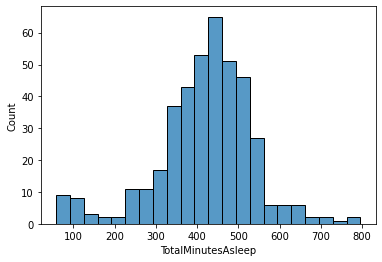

In [ ]:
sns.histplot(data=sleep, x='TotalMinutesAsleep')

We all know that an adult should get 7 or more hours of sleep per day. This corresponds to 420 minutes (420/60)

### The frequency of customers sleep tracked across the week

Text(0.5, 1.0, 'Total Minutes As Sleep users track in app across all week')

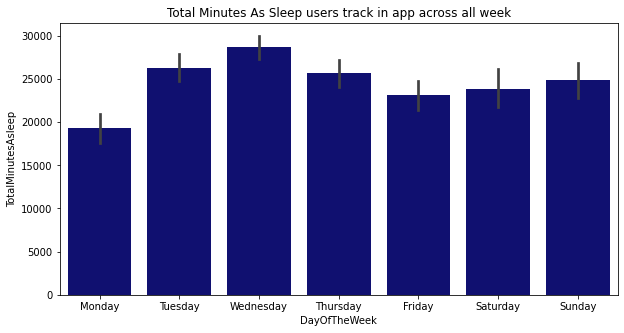

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='DayOfTheWeek', y='TotalMinutesAsleep', data=sleep, estimator=np.sum, color='navy',
            order=('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
plt.title('Total Minutes As Sleep users track in app across all week')

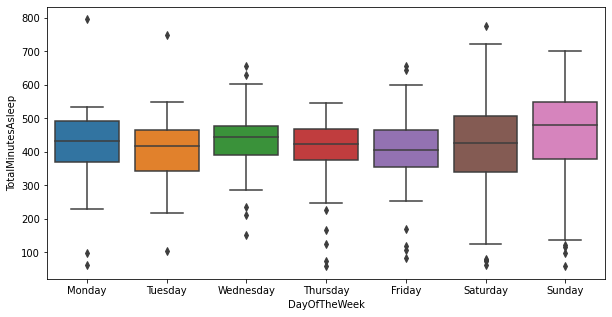

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='DayOfTheWeek', y='TotalMinutesAsleep', data=sleep, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


### Is it weekend affects on total sleep record?

* weekday = 1
* weekend = 0

##### T-Test
* H0: TotalMinutesAsleep_weekday = TotalMinutesAsleep_weekend

* H1: TotalMinutesAsleep_weekday < TotalMinutesAsleep_weekend

In [ ]:
minutes_asleep_weekday = sleep[sleep['day_type'] == 1]['TotalMinutesAsleep']
minutes_asleep_weekend = sleep[sleep['day_type'] == 0]['TotalMinutesAsleep']

In [ ]:
ttest_result = ttest_ind(a=minutes_asleep_weekday, b=minutes_asleep_weekend, equal_var=False, alternative='greater')
ttest_result

Ttest_indResult(statistic=-1.4635029794042234, pvalue=0.9273046723058891)

<BarContainer object of 2 artists>

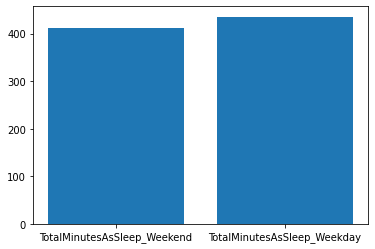

In [ ]:
x_label = ['TotalMinutesAsSleep_Weekend','TotalMinutesAsSleep_Weekday']
y_label = [minutes_asleep_weekday.mean(),
           minutes_asleep_weekend.mean()
           ]
plt.bar(x_label, y_label)

##### ANOVA Testing 

In [ ]:
asleep_monday = sleep[sleep['day_of_week'] == 0]['TotalMinutesAsleep'] #Monday
asleep_tue = sleep[sleep['day_of_week'] == 1]['TotalMinutesAsleep'] #Tue
asleep_wed = sleep[sleep['day_of_week'] == 2]['TotalMinutesAsleep'] #Wed
asleep_thurs = sleep[sleep['day_of_week'] == 3]['TotalMinutesAsleep'] #Thurs
asleep_fri = sleep[sleep['day_of_week'] == 4]['TotalMinutesAsleep'] #Fri
asleep_sat = sleep[sleep['day_of_week'] == 5]['TotalMinutesAsleep'] #Sat
asleep_sun = sleep[sleep['day_of_week'] == 6]['TotalMinutesAsleep'] #Sun

In [ ]:
#one-way ANOVA
anova_result = f_oneway(asleep_monday,asleep_tue,asleep_wed,asleep_wed,asleep_thurs,asleep_fri,asleep_sat,asleep_sun)
anova_result

F_onewayResult(statistic=1.4836674500796236, pvalue=0.17079815134633267)

In [ ]:
anova_result.pvalue 

if anova_result.pvalue < 0.05: 
     print('Reject H0 - at least one of the means differ.') 
else:
      print('Fail to reject H0 - equal mean between 7 groups') 

Fail to reject H0 - equal mean between 7 groups


There is no clear distinction between the days of week. However we can see saturday and sunday has the most spread out distribution.

### Whether or not the sleep quality is infulenced by four factors: `SedentaryMinutes` `LightlyActiveMinutes` `FairlyActiveMinutes` `VeryActiveMinutes`

In [ ]:
testing_anova_sleep = daily_df[['TotalMinutesAsleep','SedentaryMinutes','LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes']]

In [ ]:
testing_anova_sleep = testing_anova_sleep.astype('float')

In [ ]:
model_sleep = ols("""TotalMinutesAsleep ~ SedentaryMinutes + LightlyActiveMinutes + FairlyActiveMinutes + VeryActiveMinutes +
                SedentaryMinutes:LightlyActiveMinutes + SedentaryMinutes:FairlyActiveMinutes + SedentaryMinutes:VeryActiveMinutes +
                SedentaryMinutes:LightlyActiveMinutes:FairlyActiveMinutes:VeryActiveMinutes""",data = testing_anova_sleep).fit()
sm.stats.anova_lm(model_sleep, typ=2)

,sum_sq,df,F,PR(>F)
SedentaryMinutes,3.303166e+07,1.0,3472.320702,2.163431e-316
LightlyActiveMinutes,1.370793e+06,1.0,144.099123,5.722439e-31
FairlyActiveMinutes,1.678430e+05,1.0,17.643826,2.919771e-05
VeryActiveMinutes,1.279643e+04,1.0,1.345174,2.464210e-01
SedentaryMinutes:LightlyActiveMinutes,1.843622e+06,1.0,193.803354,3.689063e-40
SedentaryMinutes:FairlyActiveMinutes,2.619000e+02,1.0,0.027531,8.682518e-01
SedentaryMinutes:VeryActiveMinutes,1.730693e+05,1.0,18.193216,2.199696e-05
SedentaryMinutes:LightlyActiveMinutes:FairlyActiveMinutes:VeryActiveMinutes,1.059222e+05,1.0,11.134646,8.808411e-04
Residual,8.856461e+06,931.0,NaN,NaN


In [ ]:
testing_anova_sleep.corr()

,TotalMinutesAsleep,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
TotalMinutesAsleep,1.000000,-0.840102,0.184095,0.114637,0.074731
SedentaryMinutes,-0.840102,1.000000,-0.437104,-0.237446,-0.164671
LightlyActiveMinutes,0.184095,-0.437104,1.000000,0.148820,0.051926
FairlyActiveMinutes,0.114637,-0.237446,0.148820,1.000000,0.312420
VeryActiveMinutes,0.074731,-0.164671,0.051926,0.312420,1.000000


### Whether or not the sleep quality is infulenced by four factors: `SedentaryActiveDistance` `LightActiveDistance` `ModeratelyActiveDistance` `VeryActiveDistance`

In [ ]:
model_sleep_1 = ols("""TotalMinutesAsleep ~ SedentaryActiveDistance + LightActiveDistance + ModeratelyActiveDistance + VeryActiveDistance +
                SedentaryActiveDistance:LightActiveDistance + SedentaryActiveDistance:ModeratelyActiveDistance + SedentaryActiveDistance:VeryActiveDistance +
                SedentaryActiveDistance:LightActiveDistance:ModeratelyActiveDistance:VeryActiveDistance""",data = daily_df).fit()
sm.stats.anova_lm(model_sleep_1, typ=2)

### In order to better visualize the data I will group the `TotalMinutesAsleep` columns into four categories based on the total minutes users asleep. `Less than 5` & `5 hours to 7 hours` & `7 hours to 9 hours` `More than 9 hours`


In [ ]:
9*60

In [ ]:
sleep.loc[(sleep['TotalMinutesAsleep'] <= 300),'sleep_quality'] = 'less than 5h'
sleep.loc[(sleep['TotalMinutesAsleep'] > 300) & (sleep['TotalMinutesAsleep'] < 420),'sleep_quality'] = '5h to 7h'
sleep.loc[(sleep['TotalMinutesAsleep'] >= 420) & (sleep['TotalMinutesAsleep'] <= 540),'sleep_quality'] = '7h to 9h'
sleep.loc[(sleep['TotalMinutesAsleep'] > 540),'sleep_quality'] = 'more than 9h'
sleep

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,Id,Calories,ActivityDate,TotalDistance,TrackerDistance,LoggedActivitiesDistance,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,...,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,day_of_week,DayOfTheWeek,TotalActiveMinutes,device_usage_time,day_type,four_categories_of_steps,sleep_quality
0,1503960366,1985,2016-04-12,8.50,8.50,0,13162,1,327,346,...,6.06,0.55,1.88,1,Tuesday,366,1094,1.0,"10,000 to 14,999 steps",5h to 7h
1,1503960366,1797,2016-04-13,6.97,6.97,0,10735,2,384,407,...,4.71,0.69,1.57,2,Wednesday,257,1033,1.0,"10,000 to 14,999 steps",5h to 7h
3,1503960366,1745,2016-04-15,6.28,6.28,0,9762,1,412,442,...,2.83,1.26,2.14,4,Friday,272,998,1.0,"5,000 to 9,999 steps",5h to 7h
4,1503960366,1863,2016-04-16,8.16,8.16,0,12669,2,340,367,...,5.04,0.41,2.71,5,Saturday,267,1040,0.0,"10,000 to 14,999 steps",5h to 7h
5,1503960366,1728,2016-04-17,6.48,6.48,0,9705,1,700,712,...,2.51,0.78,3.19,6,Sunday,222,761,0.0,"5,000 to 9,999 steps",more than 9h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,8792009665,2896,2016-04-30,4.59,4.59,0,7174,1,343,360,...,3.91,0.36,0.33,5,Saturday,331,1080,0.0,"5,000 to 9,999 steps",5h to 7h
902,8792009665,1962,2016-05-01,1.04,1.04,0,1619,1,503,527,...,1.04,0.00,0.00,6,Sunday,79,913,0.0,"Less than 4,999 steps",7h to 9h
903,8792009665,2015,2016-05-02,1.17,1.17,0,1831,1,415,423,...,1.17,0.00,0.00,0,Monday,101,1017,1.0,"Less than 4,999 steps",5h to 7h
904,8792009665,2297,2016-05-03,1.55,1.55,0,2421,1,516,545,...,1.55,0.00,0.00,1,Tuesday,156,895,1.0,"Less than 4,999 steps",7h to 9h


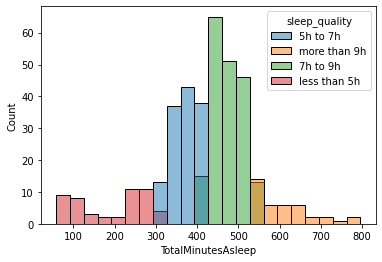

In [ ]:
sns.histplot(data=sleep, x='TotalMinutesAsleep',hue='sleep_quality')

In this graph, we can see the users's total minutes as sleep following a normal distribution. A majority of users sleep between 320 to 530 minutes

In [ ]:
sleep_categories = sleep.groupby(sleep['sleep_quality']).TotalMinutesAsleep.count()
sleep_categories

sleep_quality
5h to 7h        131
7h to 9h        190
less than 5h     50
more than 9h     39
Name: TotalMinutesAsleep, dtype: int64

In [ ]:
from google.colab import files
sleep.to_csv('dailysleep_data.csv',encoding = 'utf-8-sig')
files.download('dailysleep_data.csv')

### Sleep quality by `Sendentary Minutes`, `LightlyActiveMinutes`, `FairlyActiveMinutes`, `VeryActiveMinutes`

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Sleep quality by Sendentary Minutes, LightlyActiveMinutes, FairlyActiveMinutes, VeryActiveMinutes')

sns.boxplot(x="sleep_quality", y="SedentaryMinutes", data=sleep, ax=ax1)

sns.boxplot(x="sleep_quality", y="LightlyActiveMinutes", data=sleep, ax=ax2)

sns.boxplot(x="sleep_quality", y="FairlyActiveMinutes", data=sleep, ax=ax3)

sns.boxplot(x="sleep_quality", y="VeryActiveMinutes", data=sleep, ax=ax4)


NameError: ignored

#### ANOVA Test - Whether or not there is a statistically significant difference between the means sedentary minutes of fours categories 

H0: all the population means are equal
H1: at least one population mean is different from the rest

In [ ]:
sns.scatterplot(x='SedentaryMinutes',y='TotalTimeInBed',data=sleep)

In [ ]:
seden_less_than_5 = sleep[sleep['sleep_quality'] == 'less than 5h']['SedentaryMinutes']
seden_5h_to_7h = sleep[sleep['sleep_quality'] == '5h to 7h']['SedentaryMinutes']
seden_7h_to_9h = sleep[sleep['sleep_quality'] == '7h to 9h']['SedentaryMinutes']
seden_more_than_9h = sleep[sleep['sleep_quality'] == 'more than 9h']['SedentaryMinutes']

anova_result_sleep = f_oneway(seden_less_than_5,seden_5h_to_7h,seden_7h_to_9h,seden_more_than_9h)
anova_result_sleep

In [ ]:
anova_result_sleep.pvalue 

if anova_result_sleep.pvalue < 0.05: 
     print('Reject H0 - at least one of the means differ.') 
else:
      print('Fail to reject H0 - equal mean between 4 groups') 

In [ ]:
x_label = ['s_less_than_5','s_5h_to_7h','s_7h_to_9h','s_more_than_9h']
y_label = [seden_less_than_5.mean(),
           seden_5h_to_7h.mean(),
           seden_7h_to_9h.mean(),
           seden_more_than_9h.mean()
           ]
plt.bar(x_label, y_label)
plt.figure(figsize=(20,10))

Observation:
- The negative relationship between Sedentary Minutes and Sleep Time. Users will sleep less when they are sedentary

- If users want to improve their sleep, Bellabeat app can recommend reducing sedentary time.

AVOVA Test 

#### ANOVA Test - Whether or not there is a statistically significant difference between the means lightly active of fours categories

In [ ]:
light_less_than_5 = sleep[sleep['sleep_quality'] == 'less than 5h']['LightlyActiveMinutes']
light_5h_to_7h = sleep[sleep['sleep_quality'] == '5h to 7h']['LightlyActiveMinutes']
light_7h_to_9h = sleep[sleep['sleep_quality'] == '7h to 9h']['LightlyActiveMinutes']
light_more_than_9h = sleep[sleep['sleep_quality'] == 'more than 9h']['LightlyActiveMinutes']

anova_result_light = f_oneway(light_less_than_5,light_5h_to_7h,light_7h_to_9h,light_more_than_9h)
anova_result_light

In [ ]:
x_label = ['l_less_than_5','l_5h_to_7h','l_7h_to_9h','l_more_than_9h']
y_label = [light_less_than_5.mean(),
           light_5h_to_7h.mean(),
           light_7h_to_9h.mean(),
           light_more_than_9h.mean()
           ]
plt.bar(x_label, y_label)
plt.figure(figsize=(20,10))

### Sleep quality by `SedentaryActiveDistance` `LightActiveDistance` `ModeratelyActiveDistance` `VeryActiveDistance`

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Sleep quality by  SedentaryActiveDistance, LightActiveDistance, ModeratelyActiveDistance, VeryActiveDistance')

sns.boxplot(x="sleep_quality", y="SedentaryActiveDistance", data=sleep, ax=ax1)

sns.boxplot(x="sleep_quality", y="LightActiveDistance", data=sleep, ax=ax2)

sns.boxplot(x="sleep_quality", y="ModeratelyActiveDistance", data=sleep, ax=ax3)

sns.boxplot(x="sleep_quality", y="VeryActiveDistance", data=sleep, ax=ax4)

#### ANOVA Test - Whether or not there is a statistically significant difference between the means lightly Distance of fours categories

In [ ]:
lightdis_less_than_5 = sleep[sleep['sleep_quality'] == 'less than 5h']['LightActiveDistance']
lightdis_5h_to_7h = sleep[sleep['sleep_quality'] == '5h to 7h']['LightActiveDistance']
lightdis_7h_to_9h = sleep[sleep['sleep_quality'] == '7h to 9h']['LightActiveDistance']
lightdis_more_than_9h = sleep[sleep['sleep_quality'] == 'more than 9h']['LightActiveDistance']

anova_result_lightdis = f_oneway(lightdis_less_than_5, lightdis_5h_to_7h, lightdis_7h_to_9h, lightdis_more_than_9h)
anova_result_lightdis

In [ ]:
x_label = ['l_less_than_5','l_5h_to_7h','l_7h_to_9h','l_more_than_9h']
y_label = [lightdis_less_than_5.mean(),
           lightdis_5h_to_7h.mean(),
           lightdis_7h_to_9h.mean(),
           lightdis_more_than_9h.mean()
           ]
plt.bar(x_label, y_label)
plt.figure(figsize=(20,10))

### Sleep quality by steps

In [ ]:
merge = daily_df.merge(sleep,how='inner',on='Id')
merge

In [ ]:
sleep_by_steps = merge[['four_categories_of_steps','sleep_quality']]
sleep_by_steps

In [ ]:
less_than_4999 = sleep_by_steps.loc[sleep_by_steps['four_categories_of_steps'] == 'Less than 4,999 steps']
from_5000_9999 = sleep_by_steps.loc[sleep_by_steps['four_categories_of_steps'] == '5,000 to 9,999 steps']
from_10000_14999 = sleep_by_steps.loc[sleep_by_steps['four_categories_of_steps'] == '10,000 to 14,999 steps']
more_than_15000 = sleep_by_steps.loc[sleep_by_steps['four_categories_of_steps'] == 'More than 15,000 steps']


In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,10))

sns.countplot(data=less_than_4999, x='sleep_quality', ax=ax1)
ax1.set_title('less than 4,999 steps')

sns.countplot(data=from_5000_9999, x='sleep_quality', ax=ax2)
ax2.set_title('5,000 to 9,000 steps')

sns.countplot(data=from_10000_14999, x='sleep_quality', ax=ax3)
ax3.set_title('10,000 to 14,999 steps')

sns.countplot(data=more_than_15000, x='sleep_quality', ax=ax4)
ax4.set_title('More than 15,000 steps')

When the total steps during the day are less than 9,999 steps, the best sleep is achieve

## Calories

### Is it weekend affects on Calories?

#### T-test

* H0: Calories_weekday = Calories_weekend
* H1: Calories_weekday # Calories_weekend

In [ ]:
calories_weekday = daily_df[daily_df['day_type'] == 1]['Calories']
calories_weekend = daily_df[daily_df['day_type'] == 0]['Calories']

In [ ]:
ttest_result = ttest_ind(a=calories_weekday, b=calories_weekend, equal_var=False, alternative='two-sided')
ttest_result

In [ ]:
x_label = ['Calories Weekend','Calories Weekday']
y_label = [calories_weekday.mean(),
           calories_weekend.mean()
           ]
plt.bar(x_label, y_label)

:

## Hourly Activity

In [ ]:
hourly_df.head(5)

### Total Step by day of week

In [ ]:
step = hourly_df[['Time','ActivityHour','DayOfTheWeek','StepTotal']]
step.info()

In [ ]:
step['Time'] = step['Time'].astype('str')

In [ ]:
step = step.sort_values('Time')
step.head(5)

In [ ]:
plt.figure(figsize=(25,5))
sns.lineplot(data=step,x='Time',y='StepTotal',linestyle='-')

Users are more active between 8am and 7pm. Walking more steps during lunch time form 12pm to 2 pm and evenings from 5p, and 7pm

In [ ]:
plt.figure(figsize=(25,5))
sns.lineplot(data=step,x='Time',y='StepTotal',hue='DayOfTheWeek',linestyle='-')

### Calories by day of week

In [ ]:
calories = hourly_df[['Time','ActivityHour','DayOfTheWeek','Calories']]
calories['Time'] = calories['Time'].astype('str')
calories.info()

In [ ]:
calories = calories.sort_values('Time')
calories.head(5)

In [ ]:
plt.figure(figsize=(25,5))
sns.lineplot(data=calories,x='Time',y='Calories',hue='DayOfTheWeek',linestyle='-')

### Intensity by day of week

In [ ]:
intensity = hourly_df[['Time','ActivityHour','DayOfTheWeek','TotalIntensity','AverageIntensity']]
intensity.info()

In [ ]:
intensity['Time'] = intensity['Time'].astype('str')

In [ ]:
intensity = intensity.sort_values('Time')
intensity.head(5)

In [ ]:
plt.figure(figsize=(25,5))
sns.lineplot(data=intensity,x='Time',y='TotalIntensity',hue='DayOfTheWeek',linestyle='-')

In [ ]:
plt.figure(figsize=(25,5))
sns.lineplot(data=intensity,x='Time',y='AverageIntensity',hue='DayOfTheWeek',linestyle='-')

## Device Usage Analysis

### Days used device

We will calculate the number of users that use their tracker on daily basis, classifying users into three categories:
* Low use - users who use their device between 1 and 10 days
* moderate use - users who use their device between 10 and 20 days.
* high use - users who use their device between 21 and 31 days.

In [ ]:
days_use = sleep.groupby(sleep['Id']).ActivityDate.count()
days_use = pd.DataFrame(days_use)
days_use

In [ ]:
days_use = daily_df.groupby(daily_df['Id']).ActivityDate.count()
days_use = pd.DataFrame(days_use)
days_use

,ActivityDate
Id,
1503960366,31
1624580081,31
1644430081,30
1844505072,31
1927972279,31
2022484408,31
2026352035,31
2320127002,31
2347167796,18


In [ ]:
days_use.loc[(days_use['ActivityDate'] < 10), 'daily_use'] = 'low use'
days_use.loc[(days_use['ActivityDate'] >= 10) & (days_use['ActivityDate'] <= 20) , 'daily_use'] = 'moderate use'
days_use.loc[(days_use['ActivityDate'] >= 21) & (days_use['ActivityDate'] <= 31) , 'daily_use'] = 'high use'
days_use

,ActivityDate,daily_use
Id,,
1503960366,31,high use
1624580081,31,high use
1644430081,30,high use
1844505072,31,high use
1927972279,31,high use
2022484408,31,high use
2026352035,31,high use
2320127002,31,high use
2347167796,18,moderate use


In [ ]:
days_use.columns = ['usage_day_number','']

In [ ]:
pie_plot = days_use.daily_use.value_counts()
pie_plot = pd.DataFrame(pie_plot)
pie_plot

,daily_use
high use,29
moderate use,3
low use,1


### Whether or not users were using the tracker to track their activity types during the entire day? - Time used smart device

If users logs the whole day, then the total amount minutes users wore the device equal 1440 minutes
* All day - the day had total minutes equal 1440 mins (24hours)
* More than half day - the day had total minute more than 720 mins (12 hours)
* Less than half day - the day had total minutes less than 720 mins (12 hours)

To see how many minutes do users wear their device per day, I will merge the `days_use` table and `daily_df` 


In [ ]:
daily_df = pd.merge(daily_df,days_use, on=['Id'])
daily_df

,Id,Calories,ActivityDate_x,TotalDistance,TrackerDistance,LoggedActivitiesDistance,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,...,ModeratelyActiveDistance,VeryActiveDistance,day_of_week,DayOfTheWeek,TotalActiveMinutes,device_usage_time,day_type,wearing_time,ActivityDate_y,daily_use
0,1503960366,1985,2016-04-12,8.500000,8.500000,0,13162,1,327,346,...,0.55,1.88,1,Tuesday,366,1094,1.0,More than half day,31,high use
1,1503960366,1797,2016-04-13,6.970000,6.970000,0,10735,2,384,407,...,0.69,1.57,2,Wednesday,257,1033,1.0,More than half day,31,high use
2,1503960366,1776,2016-04-14,6.740000,6.740000,0,10460,0,0,0,...,0.40,2.44,3,Thursday,222,1440,1.0,All day,31,high use
3,1503960366,1745,2016-04-15,6.280000,6.280000,0,9762,1,412,442,...,1.26,2.14,4,Friday,272,998,1.0,More than half day,31,high use
4,1503960366,1863,2016-04-16,8.160000,8.160000,0,12669,2,340,367,...,0.41,2.71,5,Saturday,267,1040,0.0,More than half day,31,high use
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2847,2016-05-08,8.110000,8.110000,0,10686,0,0,0,...,0.20,1.08,6,Sunday,266,1440,0.0,All day,31,high use
936,8877689391,3710,2016-05-09,18.250000,18.250000,0,20226,0,0,0,...,0.80,11.10,0,Monday,309,1440,1.0,All day,31,high use
937,8877689391,2832,2016-05-10,8.150000,8.150000,0,10733,0,0,0,...,0.46,1.35,1,Tuesday,253,1440,1.0,All day,31,high use
938,8877689391,3832,2016-05-11,19.559999,19.559999,0,21420,0,0,0,...,0.41,13.22,2,Wednesday,313,1440,1.0,All day,31,high use


In [ ]:
daily_df.rename(columns = {'ActivityDate_y':'usage_day_number'}, inplace = True)

In [ ]:
daily_df.loc[(daily_df['device_usage_time']) == 1440,'wearing_time'] = 'All day'
daily_df.loc[(daily_df['device_usage_time'] < 1440) & (daily_df['device_usage_time'] >= 720),'wearing_time'] = 'More than half day'
daily_df.loc[(daily_df['device_usage_time'] < 720),'wearing_time'] = 'Less than half day'

In [ ]:
daily_df.head()

,Id,Calories,ActivityDate_x,TotalDistance,TrackerDistance,LoggedActivitiesDistance,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,...,ModeratelyActiveDistance,VeryActiveDistance,day_of_week,DayOfTheWeek,TotalActiveMinutes,device_usage_time,day_type,wearing_time,usage_day_number,daily_use
0,1503960366,1985,2016-04-12,8.50,8.50,0,13162,1,327,346,...,0.55,1.88,1,Tuesday,366,1094,1.0,More than half day,31,high use
1,1503960366,1797,2016-04-13,6.97,6.97,0,10735,2,384,407,...,0.69,1.57,2,Wednesday,257,1033,1.0,More than half day,31,high use
2,1503960366,1776,2016-04-14,6.74,6.74,0,10460,0,0,0,...,0.40,2.44,3,Thursday,222,1440,1.0,All day,31,high use
3,1503960366,1745,2016-04-15,6.28,6.28,0,9762,1,412,442,...,1.26,2.14,4,Friday,272,998,1.0,More than half day,31,high use
4,1503960366,1863,2016-04-16,8.16,8.16,0,12669,2,340,367,...,0.41,2.71,5,Saturday,267,1040,0.0,More than half day,31,high use


In [ ]:
daily_df.wearing_time.value_counts()

All day               478
More than half day    437
Less than half day     25
Name: wearing_time, dtype: int64

In [ ]:
from google.colab import files
daily_df.to_excel('daily_df.xlsx',encoding = 'utf-8-sig')
files.download('daily_df.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Presentation for this projects
https://docs.google.com/presentation/d/10c79PUF76oye_fqHy_oqWyOJu8zG0-VBpWshnnhjztI/edit?usp=sharing

# Summary of Finding

## Daily Activity 
* More than half of users fall into either sedentary or lightly active categories. 

* On an average, users cover a distance of 5 kilometers by traveling 7,600 steps and burn around 2,100 calories per day. This is too less than recommended by *CDC for good health. 

* They spend average 16.7 hours in sedentary activity , 3 hours in light activity, 13 minutes in moderate activity, and 21 minutes in very active activity per day.

* Users are most active during 11am to 2pm and during 5 pm and 7 pm. less active between 8 and 10 pm

* Tuesday and Saturday are among the most active days, users take more steps and burn more calories. Thursday and Sunday are the most passive days for users

* The data show a clear trend of burning more calories per day linked to the very active activity level, the total steps taken and total distance traveled.


## Daily Sleep
* On average users sleep 7 hours a day. The most amount of sleep they get is only on Sunday. The less amount of sleep they get is on Thursday

* The data also shows a clear trend of better quality sleep linked to the total time users in bed. There is a clear negative correlated relationship between quality sleeps and total sedentary minutes.

* The data shows the discontinuance in tracking sleep among users. 

## Device Usage
* A large majority of users use their device frequently between 21 to 31 days

* Not all users wear products  24 hours every day


# Recommendations


### Creating explainer videos and blogs to educate its users and suggesting different types of exercise.

Sedentary lifestyle is related with several health problems. Bellabeat can create explainer videos and blogs to educate its users  about the negative impacts of sedentary lifestyle and how to prevent them. Suggesting different types of exercise (ie. simple 10 minutes exercise on weekday and a more intense exercise on weekends) and calories intake and burnt rate information on the Bellabeat app.

### Enhancing social networking features in Bellabeat App

The Bellabeat team could enhance social networking features such as in-app chats, or team goal setting among users to promote exercise habits.

### Schedule advertising campaign and sending individual daily well-being reports when users are less active between 8pm and 10pm.

This is the ideal moment for Bellabeat to schedule their advertising initiatives for optimal results.
For Bellabeat to retain its consumers, this is the time period to send individual daily well-being reports to users and personalized content that offers value and helps users achieve their goals

### Recommending daily steps targets based on the user’s profile, lifestyle, and personal goals
Reminders when the user is behind the targets. Marketing team can provide fascinating tips to assist Bellabeat users achieve their daily objectives.

### Create engaging challenges or competitions to motivate its users to walk regularly
This will not only drive engagement, but also provide enormous value to them.

